<a href="https://colab.research.google.com/github/jeetu175/ML-PROJECTS-SATYAJIT/blob/main/Retail_Project_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Please Don't run the cells. You will get an error b/c the paths are not desktob paths. You can just open the cell contents and see what's the result obtained from that code.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# STEP-1 Data Reading

### Importing all the tables

In [ ]:
# Importing all the transaction tables
transc_CT=pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Power BI\Projects\Retail Business\Source Files\TRANSACTION_MASTER_DUMP\CUSTOMER_TRANSACTION_CT_FINAL.TXT",sep=',')
transc_FL=pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Power BI\Projects\Retail Business\Source Files\TRANSACTION_MASTER_DUMP\CUSTOMER_TRANSACTION_FL_FINAL.TXT",sep=',')


In [ ]:
# Importing the customer_master table
customer_master=pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Power BI\Projects\Retail Business\Source Files\CUSTOMER_MASTER_DUMP\RETAIL_CUSTOMER_MASTER_FINAL.TXT",sep='\t',encoding='Latin1')
# Importing the product master table
product_master=pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Power BI\Projects\Retail Business\Source Files\PRODUCT_MASTER_DUMP\RETAIL_PROD_MASTER_FINAL.TXT",sep=',',encoding='Latin1')
# Importing the product master table
store_master=pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Power BI\Projects\Retail Business\Source Files\STORE_MASTER_DUMP\STORE_MASTER_DUMP.TXT",sep=',',encoding='Latin1')

In [ ]:
# Getting the info of all the transaction tables
print(transc_CT.info())
print(transc_FL.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3419739 entries, 0 to 3419738
Data columns (total 8 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   CUSTOMER_ID  int64 
 1   State        object
 2   PROD_CAT     object
 3   PROD_ID      object
 4   VISIT_YEAR   int64 
 5   VISIT_MONTH  int64 
 6   CNT          int64 
 7   ORDER_QTY    int64 
dtypes: int64(5), object(3)
memory usage: 208.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686585 entries, 0 to 2686584
Data columns (total 8 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   CUSTOMER_ID  int64 
 1   State        object
 2   PROD_CAT     object
 3   PROD_ID      object
 4   VISIT_YEAR   int64 
 5   VISIT_MONTH  int64 
 6   CNT          int64 
 7   ORDER_QTY    int64 
dtypes: int64(5), object(3)
memory usage: 164.0+ MB
None


In [ ]:
# checking the similarity b/w the columns of all the transaction tables before appending
print(list(transc_CT.columns))
print(list(transc_FL.columns))
# Conclusion: All are identical

['CUSTOMER_ID', 'State', 'PROD_CAT', 'PROD_ID', 'VISIT_YEAR', 'VISIT_MONTH', 'CNT', 'ORDER_QTY']
['CUSTOMER_ID', 'State', 'PROD_CAT', 'PROD_ID', 'VISIT_YEAR', 'VISIT_MONTH', 'CNT', 'ORDER_QTY']


In [ ]:
# appending all the transaction tables
df_transc_list=[transc_CT,transc_FL]
dft1=pd.concat(df_transc_list,axis=0)

In [ ]:
# To validate the count of rows obtained with the sum of all the count of rows of each tables/dataframes before appending
dft1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6106324 entries, 0 to 2686584
Data columns (total 8 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   CUSTOMER_ID  int64 
 1   State        object
 2   PROD_CAT     object
 3   PROD_ID      object
 4   VISIT_YEAR   int64 
 5   VISIT_MONTH  int64 
 6   CNT          int64 
 7   ORDER_QTY    int64 
dtypes: int64(5), object(3)
memory usage: 419.3+ MB


In [ ]:
# Making a copy of dft1 as dft
dft=dft1.copy()

In [ ]:
# for better memory optimisation of 'dft' dataframe, I have converted the 'int64' datatypes to 
# 'int32' and 'object' datatypes to 'category'
def my_optimisation(df):
    l=list(df.columns)
    d=dict(df.dtypes)
    for i in range(0,len(l)):
        if df.dtypes[i]=="int64":
            df[l[i]]=df[l[i]].astype('int32')
            continue
        elif df.dtypes[i]=="object":
            df[l[i]]=df[l[i]].astype('category')
            continue
        elif df.dtypes[i]=="float64":
            df[l[i]]=df[l[i]].astype('float32')
            continue
#     print(df.dtypes)
my_optimisation(dft) 

In [ ]:
# Checking the memory optimisation
def memory_stats(initial,final):
    '''Checking the memory optimisation'''
    initial_memory_usage=(initial.memory_usage().sum())/10**9
    final_memory_usage=(final.memory_usage().sum())/10**9
    print(f"initial memory usage -->{'{:.2f}'.format(initial_memory_usage)} GB\n"
          f"final_memory_usage-->{'{:.2f}'.format(final_memory_usage)} GB\n"
          f"memory saved={'{:.2f}'.format(initial_memory_usage-final_memory_usage)} GB\n"
          f"memory saved%={'{:.2%}'.format((initial_memory_usage-final_memory_usage)/initial_memory_usage)}")
memory_stats(initial=dft1,final=dft)

initial memory usage -->0.44 GB
final_memory_usage-->0.20 GB
memory saved=0.24 GB
memory saved%=55.52%


## Exporting the data into a new text file

In [ ]:
#Exporting the final transaction data into python

In [ ]:
# dft1.to_csv(r"C:\Users\Hp\OneDrive\Desktop\Power BI\Projects\Retail Business\Source Files\All_Transactions",sep=',',index=False)

# STEP-2 Data Preparation

In [ ]:
# All the dataframes/tables obtained 
# dft1
# customer_master
# product_master
# store_master

### Customer_Master 

In [ ]:
customer_master.columns

Index(['CUSTOMER_ID', 'First_Name', 'Last_Name', 'Gender', 'E_Mail',
       'Date_of_Birth', 'SSN', 'Phone_No', 'STATE_NAME', 'State', 'Zip',
       'Region', 'STORE_ID', 'STORE_REG_DATE'],
      dtype='object')

In [ ]:
# Tasks---->
# CUSTOMER_MASTER 
# 1)Get Customer Age from DATE_OF_BIRTH variable
# 2)Create an Age_Bucket from age 
# IF CUSTOMER_AGE >= 60 THEN AGE_BUCKET='A5.OLD-AGE';
# IF CUSTOMER_AGE >= 50 THEN AGE_BUCKET='A4.MID-OLD-AGE';
# IF CUSTOMER_AGE >= 40 THEN AGE_BUCKET='A3.MID-AGE';
# IF CUSTOMER_AGE >= 30 THEN AGE_BUCKET='A2.MID-YOUNG-AGE';
# ELSE AGE_BUCKET='A1.YOUNG-AGE’;
# 3)Get Relationship Age from STORE_REG_DATE 
# 4)Create an AON (Age On network) conditional variable from Relationship Age 
# IF RELATIONSHIP_AGE >= 60 THEN AON='A1.5+ YEARS';
# ELSE IF RELATIONSHIP_AGE >= 48 THEN AON='A2.4+ YEARS';
# ELSE IF RELATIONSHIP_AGE >= 36 THEN AON='A3.3+ YEARS';
# ELSE IF RELATIONSHIP_AGE >= 24 THEN AON='A4.2+ YEARS';
# ELSE IF RELATIONSHIP_AGE >= 12 THEN AON='A5.1+ YEARS';
# ELSE IF RELATIONSHIP_AGE >= 6 THEN AON='A6.6M+ YEARS';
# ELSE AON='A7.NEW’;


In [ ]:
#1)Get Customer Age from DATE_OF_BIRTH variable
import datetime as dt
from datetime import datetime

# Cleaning the Date_of _Birth column and adding anew column or series i.e. cleaned_DOB
customer_master['cleaned_DOB']=np.where(customer_master['Date_of_Birth'].str.contains('/')==True,
          customer_master['Date_of_Birth'].replace('/','-',regex=True),customer_master['Date_of_Birth'])

customer_master['cleaned_DOB']=customer_master['cleaned_DOB'].astype('datetime64')
customer_master.head()
customer_master['cleaned_DOB']


#getting the customer age
customer_master['Customer_Age']=datetime.now().year-customer_master['cleaned_DOB'].dt.year
customer_master.head()


,CUSTOMER_ID,First_Name,Last_Name,Gender,E_Mail,Date_of_Birth,SSN,Phone_No,STATE_NAME,State,Zip,Region,STORE_ID,STORE_REG_DATE,cleaned_DOB,Customer_Age
0,135363,Lizeth,Mccoll,F,lizeth.mccoll@ibm.com,07-05-1973,171-86-6830,216-703-2865,California,CA,44601,Midwest,STORE_81,12-03-2003,1973-07-05,49
1,135384,Damian,Patillo,M,damian.patillo@outlook.com,03-11-1975,326-11-9852,209-784-3915,Oklahoma,OK,93607,West,STORE_79,17-06-2014,1975-03-11,47
2,135395,Imogene,Hagopian,F,imogene.hagopian@gmail.com,2/19/1995,656-36-0772,210-460-6327,Louisiana,LA,77806,South,STORE_126,15-05-2008,1995-02-19,27
3,135400,Jesusita,Hollie,F,jesusita.hollie@hotmail.com,10/30/1987,375-37-3861,209-219-5562,Minnesota,MN,90290,West,STORE_54,17-12-2013,1987-10-30,35
4,135409,Vanda,Komar,F,vanda.komar@aol.com,09-02-1962,002-11-5408,216-224-9563,Michigan,MI,44312,Midwest,STORE_143,26-09-2014,1962-09-02,60


In [ ]:
# My own experiment--->Not included in the tasks/procedures of the project
# Adding some years to the cleaned_DOB column
z=(customer_master['cleaned_DOB'].astype('int64')).astype('datetime64[ns]')
print(z)
from dateutil.relativedelta import relativedelta as rd
customer_master['cleaned_DOB'].dt.date+rd(years=2)

0        1973-07-05
1        1975-03-11
2        1995-02-19
3        1987-10-30
4        1962-09-02
            ...    
378051   1999-04-15
378052   1964-02-18
378053   1970-06-11
378054   1997-09-07
378055   1978-05-16
Name: cleaned_DOB, Length: 378056, dtype: datetime64[ns]


0         1975-07-05
1         1977-03-11
2         1997-02-19
3         1989-10-30
4         1964-09-02
             ...    
378051    2001-04-15
378052    1966-02-18
378053    1972-06-11
378054    1999-09-07
378055    1980-05-16
Name: cleaned_DOB, Length: 378056, dtype: object

In [ ]:
# 2)Create an Age_Bucket from age 
# IF CUSTOMER_AGE >= 60 THEN AGE_BUCKET='A5.OLD-AGE';
# IF CUSTOMER_AGE >= 50 THEN AGE_BUCKET='A4.MID-OLD-AGE';
# IF CUSTOMER_AGE >= 40 THEN AGE_BUCKET='A3.MID-AGE';
# IF CUSTOMER_AGE >= 30 THEN AGE_BUCKET='A2.MID-YOUNG-AGE';
# ELSE AGE_BUCKET='A1.YOUNG-AGE’;
age_conditions=[customer_master['Customer_Age']>=60,customer_master['Customer_Age']>=50,customer_master['Customer_Age']>=40,
               customer_master['Customer_Age']>=30]
age_values=['A5.OLD-AGE','A4.MID-OLD-AGE','A3.MID-AGE','A2.MID-YOUNG-AGE']
customer_master['Age_Bucket']=np.select(age_conditions,age_values,default='A1.YOUNG-AGE')
print(customer_master['Age_Bucket'].value_counts())
customer_master.head()

A2.MID-YOUNG-AGE    97138
A3.MID-AGE          97111
A4.MID-OLD-AGE      97077
A1.YOUNG-AGE        64438
A5.OLD-AGE          22292
Name: Age_Bucket, dtype: int64


,CUSTOMER_ID,First_Name,Last_Name,Gender,E_Mail,Date_of_Birth,SSN,Phone_No,STATE_NAME,State,Zip,Region,STORE_ID,STORE_REG_DATE,cleaned_DOB,Customer_Age,Age_Bucket
0,135363,Lizeth,Mccoll,F,lizeth.mccoll@ibm.com,07-05-1973,171-86-6830,216-703-2865,California,CA,44601,Midwest,STORE_81,12-03-2003,1973-07-05,49,A3.MID-AGE
1,135384,Damian,Patillo,M,damian.patillo@outlook.com,03-11-1975,326-11-9852,209-784-3915,Oklahoma,OK,93607,West,STORE_79,17-06-2014,1975-03-11,47,A3.MID-AGE
2,135395,Imogene,Hagopian,F,imogene.hagopian@gmail.com,2/19/1995,656-36-0772,210-460-6327,Louisiana,LA,77806,South,STORE_126,15-05-2008,1995-02-19,27,A1.YOUNG-AGE
3,135400,Jesusita,Hollie,F,jesusita.hollie@hotmail.com,10/30/1987,375-37-3861,209-219-5562,Minnesota,MN,90290,West,STORE_54,17-12-2013,1987-10-30,35,A2.MID-YOUNG-AGE
4,135409,Vanda,Komar,F,vanda.komar@aol.com,09-02-1962,002-11-5408,216-224-9563,Michigan,MI,44312,Midwest,STORE_143,26-09-2014,1962-09-02,60,A5.OLD-AGE


In [ ]:
customer_master.columns

Index(['CUSTOMER_ID', 'First_Name', 'Last_Name', 'Gender', 'E_Mail',
       'Date_of_Birth', 'SSN', 'Phone_No', 'STATE_NAME', 'State', 'Zip',
       'Region', 'STORE_ID', 'STORE_REG_DATE', 'cleaned_DOB', 'Customer_Age',
       'Age_Bucket'],
      dtype='object')

In [ ]:
# Get Relationship Age from STORE_REG_DATE

# converting the date(object type) series into date(date-time type)
customer_master['STORE_REG_DATE']=customer_master['STORE_REG_DATE'].astype('datetime64[ns]')
customer_master['STORE_REG_DATE']

customer_master['Relationship_Age']=(datetime.now().year-customer_master['STORE_REG_DATE'].dt.year)*12
# Note the Relationship_Age column obtained is in "months" ,not in years
customer_master.head()
customer_master['Relationship_Age'].value_counts()

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '17-06-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '15-05-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '17-12-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '26-09-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '27-08-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '26-02-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '15-05-2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '23-05-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '14-10-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '27-04-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '24-05-2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '19-06-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '27-04-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '15-11-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '25-03-2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '26-12-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '14-05-2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '23-04-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '17-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '22-02-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '14-11-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '19-07-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '22-05-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '16-12-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1

48     19066
60     19065
96     19058
72     19040
168    18983
120    18976
36     18966
192    18931
216    18930
252    18908
180    18907
228    18906
156    18898
108    18878
204    18871
132    18861
240    18831
144    18739
24     18632
84     18610
Name: Relationship_Age, dtype: int64

In [ ]:
# 4)Create an AON (Age On network) conditional variable from Relationship Age 
# IF RELATIONSHIP_AGE >= 60 THEN AON='A1.5+ YEARS';
# ELSE IF RELATIONSHIP_AGE >= 48 THEN AON='A2.4+ YEARS';
# ELSE IF RELATIONSHIP_AGE >= 36 THEN AON='A3.3+ YEARS';
# ELSE IF RELATIONSHIP_AGE >= 24 THEN AON='A4.2+ YEARS';
# ELSE IF RELATIONSHIP_AGE >= 12 THEN AON='A5.1+ YEARS';
# ELSE IF RELATIONSHIP_AGE >= 6 THEN AON='A6.6M+ YEARS';
# ELSE AON='A7.NEW’;

aon_conditions=[customer_master['Relationship_Age']>=60,customer_master['Relationship_Age']>=48,
               customer_master['Relationship_Age']>=36,customer_master['Relationship_Age']>=24,
               customer_master['Relationship_Age']>=12,customer_master['Relationship_Age']>=6]
aon_values=['A1.5+ YEARS','A2.4+ YEARS','A3.3+ YEARS','A4.2+ YEARS','A5.1+ YEARS','A3.6+ MONTHS']
customer_master['AON']=np.select(aon_conditions,aon_values,'A7.NEW')
customer_master.head()
customer_master['AON'].value_counts()

A1.5+ YEARS    321392
A2.4+ YEARS     19066
A3.3+ YEARS     18966
A4.2+ YEARS     18632
Name: AON, dtype: int64

In [ ]:
customer_master.columns

Index(['CUSTOMER_ID', 'First_Name', 'Last_Name', 'Gender', 'E_Mail',
       'Date_of_Birth', 'SSN', 'Phone_No', 'STATE_NAME', 'State', 'Zip',
       'Region', 'STORE_ID', 'STORE_REG_DATE', 'cleaned_DOB', 'Customer_Age',
       'Age_Bucket', 'Relationship_Age', 'AON'],
      dtype='object')

In [ ]:
customer_master_optimised=customer_master.copy()
my_optimisation(customer_master_optimised)

In [ ]:
memory_stats(customer_master,customer_master_optimised)

initial memory usage -->0.06 GB
final_memory_usage-->0.06 GB
memory saved=0.00 GB
memory saved%=0.02%


### STORE_MASTER

In [ ]:
# • STORE_MASTER 
# • Create a new variable STORE_SIZE
# IF STORE_SIZE_SQ_FT >= 5000 THEN STORE_SIZE='BIG STORE';
# ELSE IF STORE_SIZE_SQ_FT >= 3000 THEN STORE_SIZE='MID STORE';
# ELSE STORE_SIZE='MINI STORE';
# • Create a new variable STORE_AGE from STORE_INC_DATE
# • From STORE_AGE create a new conditional variable STORE_TYPE
# IF STORE_AGE > 10 THEN STORE_TYPE='OLD-AGE';
# ELSE IF STORE_AGE > 5 THEN STORE_TYPE='MID-AGE';
# ELSE IF STORE_AGE > 2 THEN STORE_TYPE='GROWTH-AGE';
# ELSE STORE_TYPE='NEW-AGE’;

In [ ]:
store_master.columns

Index(['STORE_ID', 'STORE_NAME', 'PROVINCE', 'STORE_INC_DATE',
       'STORE_SIZE_SQ_FT', 'NO_OF_STAFFS'],
      dtype='object')

In [ ]:
# 1.Create a new variable STORE_SIZE
# IF STORE_SIZE_SQ_FT >= 5000 THEN STORE_SIZE='BIG STORE';
# ELSE IF STORE_SIZE_SQ_FT >= 3000 THEN STORE_SIZE='MID STORE';
# ELSE STORE_SIZE='MINI STORE';

store_size_conditions=[store_master['STORE_SIZE_SQ_FT']>=5000,store_master['STORE_SIZE_SQ_FT']>=3000]
store_size_values=['BIG STORE','MID STORE']
store_master['STORE_SIZE']=np.select(store_size_conditions,store_size_values,'MINI STORE')

store_master['STORE_SIZE'].value_counts()
store_master.head()

,STORE_ID,STORE_NAME,PROVINCE,STORE_INC_DATE,STORE_SIZE_SQ_FT,NO_OF_STAFFS,STORE_SIZE
0,STORE_1,Acme Fresh Market,Ohio,12/12/2003,9656,22,BIG STORE
1,STORE_2,Amigo Supermarkets,Pennsylvania,12/11/2002,4113,28,MID STORE
2,STORE_3,Big Y,Massachusetts,08/11/2002,6194,11,BIG STORE
3,STORE_4,Big Y,Connecticut,01/23/2005,4543,12,MID STORE
4,STORE_5,Buehler's,Ohio,10/09/2004,3147,30,MID STORE


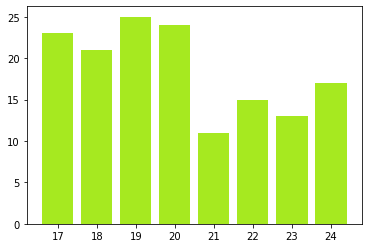

In [ ]:
# 2. Create a new variable STORE_AGE from STORE_INC_DATE


store_master['STORE_INC_DATE']=store_master['STORE_INC_DATE'].replace('/','-',regex=True).astype('datetime64')
store_master['STORE_INC_DATE']
store_master['STORE_AGE']=datetime.now().year-store_master['STORE_INC_DATE'].dt.year

# Let's see how the store_ages with their occurance values look in a bar graph
plt.bar(store_master['STORE_AGE'].unique(),dict(store_master['STORE_AGE'].value_counts()).values(),color='#A6E920')
# plt.title()
# ='Number of Occurances of Store Ages'
# plt.xlabel('Store Age')
# plt.ylabel('Frequency')


plt.show()

[17.0, 18.0, 19.0, 20.0, 20.0, 21.0, 22.0, 23.0, 24.0, 24.0]


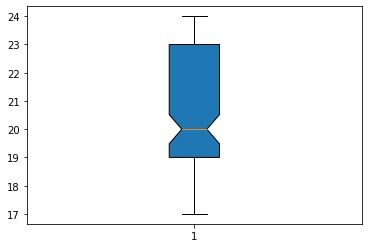

MID-AGE       52
GROWTH-AGE    44
NEW-AGE       36
OLD-AGE       17
Name: STORE TYPE, dtype: int64

In [ ]:
# 3. From STORE_AGE create a new conditional variable STORE_TYPE
# IF STORE_AGE > 10 THEN STORE_TYPE='OLD-AGE';
# ELSE IF STORE_AGE > 5 THEN STORE_TYPE='MID-AGE';
# ELSE IF STORE_AGE > 2 THEN STORE_TYPE='GROWTH-AGE';
# ELSE STORE_TYPE='NEW-AGE’;

# used quantile and boxplot to see the statistical and quantile distribution of value-points inorder to
# give the conditional-values
print(list(store_master['STORE_AGE'].quantile([.01,.2,.3,.4,.5,.6,.7,.8,.9,1])))
plt.boxplot(store_master['STORE_AGE'],notch=True,patch_artist=True)
plt.show()

# Conclusion-->Boxplot shows better distribution than quantile-method
# using those boxplot values to give conditional-values to 'STORE_AGE' to find out the values of store_type without any biasness
store_type_conditions=[store_master['STORE_AGE']>23,store_master['STORE_AGE']>20,store_master['STORE_AGE']>18]
store_type_values=['OLD-AGE','MID-AGE','GROWTH-AGE']
store_master['STORE TYPE']=np.select(store_type_conditions,store_type_values,'NEW-AGE')
store_master['STORE TYPE'].value_counts()                                   

In [ ]:
store_master.columns

Index(['STORE_ID', 'STORE_NAME', 'PROVINCE', 'STORE_INC_DATE',
       'STORE_SIZE_SQ_FT', 'NO_OF_STAFFS', 'STORE_SIZE', 'STORE_AGE',
       'STORE TYPE'],
      dtype='object')

In [ ]:
store_master.head()
store_master['STORE_NAME'].nunique() #----->81 stores are there

81

In [ ]:
store_master_optimised=store_master.copy()
my_optimisation(store_master_optimised)

In [ ]:
memory_stats(customer_master,customer_master_optimised)

initial memory usage -->0.06 GB
final_memory_usage-->0.06 GB
memory saved=0.00 GB
memory saved%=0.02%


# STEP-3: DESIGN DATA MODEL

In [ ]:
# dataframes--->
# dft
# customer_master
# product_master
# store_master

In [ ]:
# making a copy of 'dft1' as 'transaction_tab' for better naming conventions
transaction_tab=dft.copy()

In [ ]:
# Columns of all the dataframes
print(f"transaction-->\n{list(transaction_tab.columns)}\n")
print(f"customer_master-->\n{list(customer_master_optimised.columns)}\n")
print(f"product_master-->\n{list(product_master.columns)}\n")
print(f"store_master-->\n{list(store_master_optimised.columns)}\n")


transaction-->
['CUSTOMER_ID', 'State', 'PROD_CAT', 'PROD_ID', 'VISIT_YEAR', 'VISIT_MONTH', 'CNT', 'ORDER_QTY']

customer_master-->
['CUSTOMER_ID', 'First_Name', 'Last_Name', 'Gender', 'E_Mail', 'Date_of_Birth', 'SSN', 'Phone_No', 'STATE_NAME', 'State', 'Zip', 'Region', 'STORE_ID', 'STORE_REG_DATE', 'cleaned_DOB', 'Customer_Age', 'Age_Bucket', 'Relationship_Age', 'AON']

product_master-->
['PRODUCT', 'CATEGORY', 'SUB_CATEGORY', 'BRAND', 'SALE_PRICE_INR', 'SALE_PRICE_USD', 'MARKET_PRICE', 'MARKET_USD', 'TYPE', 'RATING', 'DESCRIPTION', 'RAND_NO', 'CAT', 'PD_ID', 'PROD_ID', 'PRICE_YEAR', 'COST_PRICE_INR', 'COST_PRICE_USD']

store_master-->
['STORE_ID', 'STORE_NAME', 'PROVINCE', 'STORE_INC_DATE', 'STORE_SIZE_SQ_FT', 'NO_OF_STAFFS', 'STORE_SIZE', 'STORE_AGE', 'STORE TYPE']



In [ ]:
dm1=pd.merge(left=transaction_tab,right=customer_master_optimised,how='left',on='CUSTOMER_ID')
dm2=pd.merge(left=dm1,right=product_master,how='left',left_on=['PROD_CAT','PROD_ID','VISIT_YEAR'],right_on=['CAT','PROD_ID','PRICE_YEAR'])

print(list(dm2.columns))
dm2.head()

['CUSTOMER_ID', 'State_x', 'PROD_CAT', 'PROD_ID', 'VISIT_YEAR', 'VISIT_MONTH', 'CNT', 'ORDER_QTY', 'First_Name', 'Last_Name', 'Gender', 'E_Mail', 'Date_of_Birth', 'SSN', 'Phone_No', 'STATE_NAME', 'State_y', 'Zip', 'Region', 'STORE_ID', 'STORE_REG_DATE', 'cleaned_DOB', 'Customer_Age', 'Age_Bucket', 'Relationship_Age', 'AON', 'PRODUCT', 'CATEGORY', 'SUB_CATEGORY', 'BRAND', 'SALE_PRICE_INR', 'SALE_PRICE_USD', 'MARKET_PRICE', 'MARKET_USD', 'TYPE', 'RATING', 'DESCRIPTION', 'RAND_NO', 'CAT', 'PD_ID', 'PRICE_YEAR', 'COST_PRICE_INR', 'COST_PRICE_USD']


,CUSTOMER_ID,State_x,PROD_CAT,PROD_ID,VISIT_YEAR,VISIT_MONTH,CNT,ORDER_QTY,First_Name,Last_Name,...,MARKET_USD,TYPE,RATING,DESCRIPTION,RAND_NO,CAT,PD_ID,PRICE_YEAR,COST_PRICE_INR,COST_PRICE_USD
0,135554,CT,CAT-A,PROD-1205,2020,3,1,3,Livia,Barefield,...,0.615385,Chocolates,4.2,The deliciously smooth chocolate bars from the...,805.0,CAT-A,1205.0,2020.0,27.20,0.418462
1,135554,CT,CAT-A,PROD-1247,2020,3,1,4,Livia,Barefield,...,1.769231,Shower Gel & Body Wash,4.3,Who doesnât like having smooth skin? We all ...,978.0,CAT-A,1247.0,2020.0,84.15,1.294615
2,135554,CT,CAT-A,PROD-1630,2020,3,1,5,Livia,Barefield,...,7.615385,Face Care,4.3,Clean & Clear Foaming face wash is specially d...,928.0,CAT-A,1630.0,2020.0,311.25,4.788462
3,135554,CT,CAT-A,PROD-3767,2020,3,1,2,Livia,Barefield,...,21.184615,Supplements & Proteins,NaN,With one of the richest compositions of powerf...,836.0,CAT-A,3767.0,2020.0,1211.76,18.642462
4,135554,CT,CAT-A,PROD-730,2020,3,1,4,Livia,Barefield,...,6.923077,Leaf & Dust Tea,4.5,Darjeeling tea occupies a place of pride for I...,903.0,CAT-A,730.0,2020.0,423.00,6.507692


In [ ]:
# for better memory optimisation of 'dft' dataframe, I have converted the 'int64' datatypes to 
# 'int32' and 'object' datatypes to 'category'
dm2_optimised=dm2.copy()
my_optimisation(dm2_optimised)

In [ ]:
# Checking the memory saved
memory_stats(initial=dm2,final=dm2_optimised)

initial memory usage -->1.46 GB
final_memory_usage-->0.84 GB
memory saved=0.62 GB
memory saved%=42.40%


In [ ]:
final_data_model=pd.merge(left=dm2_optimised,right=store_master_optimised,how='left',on='STORE_ID')
print(list(final_data_model.columns))
final_data_model.head()

['CUSTOMER_ID', 'State_x', 'PROD_CAT', 'PROD_ID', 'VISIT_YEAR', 'VISIT_MONTH', 'CNT', 'ORDER_QTY', 'First_Name', 'Last_Name', 'Gender', 'E_Mail', 'Date_of_Birth', 'SSN', 'Phone_No', 'STATE_NAME', 'State_y', 'Zip', 'Region', 'STORE_ID', 'STORE_REG_DATE', 'cleaned_DOB', 'Customer_Age', 'Age_Bucket', 'Relationship_Age', 'AON', 'PRODUCT', 'CATEGORY', 'SUB_CATEGORY', 'BRAND', 'SALE_PRICE_INR', 'SALE_PRICE_USD', 'MARKET_PRICE', 'MARKET_USD', 'TYPE', 'RATING', 'DESCRIPTION', 'RAND_NO', 'CAT', 'PD_ID', 'PRICE_YEAR', 'COST_PRICE_INR', 'COST_PRICE_USD', 'STORE_NAME', 'PROVINCE', 'STORE_INC_DATE', 'STORE_SIZE_SQ_FT', 'NO_OF_STAFFS', 'STORE_SIZE', 'STORE_AGE', 'STORE TYPE']


,CUSTOMER_ID,State_x,PROD_CAT,PROD_ID,VISIT_YEAR,VISIT_MONTH,CNT,ORDER_QTY,First_Name,Last_Name,...,COST_PRICE_INR,COST_PRICE_USD,STORE_NAME,PROVINCE,STORE_INC_DATE,STORE_SIZE_SQ_FT,NO_OF_STAFFS,STORE_SIZE,STORE_AGE,STORE TYPE
0,135554,CT,CAT-A,PROD-1205,2020,3,1,3,Livia,Barefield,...,27.200001,0.418462,Stew Leonard's,Connecticut,2004-07-03,5667,21,BIG STORE,18,NEW-AGE
1,135554,CT,CAT-A,PROD-1247,2020,3,1,4,Livia,Barefield,...,84.150002,1.294615,Stew Leonard's,Connecticut,2004-07-03,5667,21,BIG STORE,18,NEW-AGE
2,135554,CT,CAT-A,PROD-1630,2020,3,1,5,Livia,Barefield,...,311.250000,4.788462,Stew Leonard's,Connecticut,2004-07-03,5667,21,BIG STORE,18,NEW-AGE
3,135554,CT,CAT-A,PROD-3767,2020,3,1,2,Livia,Barefield,...,1211.760010,18.642462,Stew Leonard's,Connecticut,2004-07-03,5667,21,BIG STORE,18,NEW-AGE
4,135554,CT,CAT-A,PROD-730,2020,3,1,4,Livia,Barefield,...,423.000000,6.507692,Stew Leonard's,Connecticut,2004-07-03,5667,21,BIG STORE,18,NEW-AGE


In [ ]:
# Function to give the information about the memory used in the given dataframe in GBs
def memory_eating(df):
    '''Gives the information about the memory used in the given dataframe in GBs'''
    print(f"memory usage --->{'{:.2f}'.format((df.memory_usage().sum())/10**9)} GB")
    
memory_eating(final_data_model)

memory usage --->1.03 GB


In [ ]:
final_data_model.shape

(6106324, 51)

In [ ]:
# checking if the memory usage can further be reduced
final_data_model2=final_data_model.copy()

In [ ]:
my_optimisation(final_data_model2)

In [ ]:
memory_stats(final_data_model,final_data_model2)
# Yes it can further be reduced by around 4%

initial memory usage -->1.03 GB
final_memory_usage-->0.99 GB
memory saved=0.04 GB
memory saved%=4.14%


In [ ]:
final_data_model2.head()

,CUSTOMER_ID,State_x,PROD_CAT,PROD_ID,VISIT_YEAR,VISIT_MONTH,CNT,ORDER_QTY,First_Name,Last_Name,...,COST_PRICE_INR,COST_PRICE_USD,STORE_NAME,PROVINCE,STORE_INC_DATE,STORE_SIZE_SQ_FT,NO_OF_STAFFS,STORE_SIZE,STORE_AGE,STORE TYPE
0,135554,CT,CAT-A,PROD-1205,2020,3,1,3,Livia,Barefield,...,27.200001,0.418462,Stew Leonard's,Connecticut,2004-07-03,5667,21,BIG STORE,18,NEW-AGE
1,135554,CT,CAT-A,PROD-1247,2020,3,1,4,Livia,Barefield,...,84.150002,1.294615,Stew Leonard's,Connecticut,2004-07-03,5667,21,BIG STORE,18,NEW-AGE
2,135554,CT,CAT-A,PROD-1630,2020,3,1,5,Livia,Barefield,...,311.250000,4.788462,Stew Leonard's,Connecticut,2004-07-03,5667,21,BIG STORE,18,NEW-AGE
3,135554,CT,CAT-A,PROD-3767,2020,3,1,2,Livia,Barefield,...,1211.760010,18.642462,Stew Leonard's,Connecticut,2004-07-03,5667,21,BIG STORE,18,NEW-AGE
4,135554,CT,CAT-A,PROD-730,2020,3,1,4,Livia,Barefield,...,423.000000,6.507692,Stew Leonard's,Connecticut,2004-07-03,5667,21,BIG STORE,18,NEW-AGE


In [ ]:
# Some more data conversions
final_data_model2['SALE_PRICE_INR']=final_data_model2['SALE_PRICE_INR'].astype('float32')

In [ ]:
memory_eating(final_data_model2)

memory usage --->1.00 GB


# STEP-4 Preparation of KPIs

### CUSTOMER ANALYTICS

In [ ]:
# NOTE: USE THIS FUNCTION ONLY IF YOU DON'T HAVE ANY 'SALES_INR' OR 'SALES_USD' COLUMN
def get_sales():
    '''This function creates a sales column which will help in further analysis'''
    get_sales_condition1='sales_INR' in list(final_data_model2.columns)
    get_sales_condition2='sales_USD' in list(final_data_model2.columns)
    if get_sales_condition1==True:
        print(f"*"*(10**2),"\n")
        print("You already have the 'sales_INR' column buddy.\n\nFirst Delete it to get a new one again\n")
        print(f"*"*(10**2))
    elif get_sales_condition2==True:
        print(f"*"*(10**2),"\n")
        print("You already have the 'sales_USD' column buddy.\n\nFirst Delete it to get a new one again\n")
        print(f"*"*(10**2))
    else:
        ''' It returns the sales column based on USD or INR'''
        sales_unit_decide=input("You want to see the sales in USD or INR?: ")
        if sales_unit_decide=="INR":
            final_data_model2['sales_INR']=final_data_model2['SALE_PRICE_INR']*final_data_model2['ORDER_QTY']
            print("You got your 'sales_INR' column created.")
        elif sales_unit_decide=="USD":
            final_data_model2['sales_USD']=final_data_model2['SALE_PRICE_USD']*final_data_model2['ORDER_QTY']
            print("You got your 'sales_USD' column created.")
        else:
            print("Choose the currency either b/w INR or USD")
# get_sales()
final_data_model2['sales_INR']=final_data_model2['SALE_PRICE_INR']*final_data_model2['ORDER_QTY']

In [ ]:
print(memory_eating(final_data_model2))

final_data_model2.iloc[:,-1].info()

memory usage --->1.03 GB
None
<class 'pandas.core.series.Series'>
Int64Index: 6106324 entries, 0 to 6106323
Series name: sales_INR
Non-Null Count    Dtype  
--------------    -----  
6004766 non-null  float32
dtypes: float32(1)
memory usage: 69.9 MB


In [ ]:
# First we get a new column of customer names (mixture of first_names and last_names)
# and then drop those first and last_names columns

final_data_model2['customer_name']=final_data_model2['First_Name'].astype('str')+" "+final_data_model2['Last_Name'].astype('str')

# dropping other irrelevant name columns/series
final_data_model2.drop(['First_Name','Last_Name'],axis=1,inplace=True)

In [ ]:
memory_eating(final_data_model2)          #--->initially it was 1.05 GB
my_optimisation(final_data_model2)
memory_eating(final_data_model2)          #--->finally it become 1.03 GB after optimisation

memory usage --->1.05 GB
memory usage --->1.03 GB


In [ ]:
final_data_model2.columns

Index(['CUSTOMER_ID', 'State_x', 'PROD_CAT', 'PROD_ID', 'VISIT_YEAR',
       'VISIT_MONTH', 'CNT', 'ORDER_QTY', 'Gender', 'E_Mail', 'Date_of_Birth',
       'SSN', 'Phone_No', 'STATE_NAME', 'State_y', 'Zip', 'Region', 'STORE_ID',
       'STORE_REG_DATE', 'cleaned_DOB', 'Customer_Age', 'Age_Bucket',
       'Relationship_Age', 'AON', 'PRODUCT', 'CATEGORY', 'SUB_CATEGORY',
       'BRAND', 'SALE_PRICE_INR', 'SALE_PRICE_USD', 'MARKET_PRICE',
       'MARKET_USD', 'TYPE', 'RATING', 'DESCRIPTION', 'RAND_NO', 'CAT',
       'PD_ID', 'PRICE_YEAR', 'COST_PRICE_INR', 'COST_PRICE_USD', 'STORE_NAME',
       'PROVINCE', 'STORE_INC_DATE', 'STORE_SIZE_SQ_FT', 'NO_OF_STAFFS',
       'STORE_SIZE', 'STORE_AGE', 'STORE TYPE', 'sales_INR', 'customer_name'],
      dtype='object')

In [ ]:
# Let's calculate some important measures
# calculating 'total_sales'
total_sales=final_data_model2['sales_INR'].sum()

# total quantity sold
total_quantity_sold=final_data_model2['ORDER_QTY'].sum()
total_quantity_sold
# unique customer base
unique_customer_base=final_data_model2['customer_name'].nunique()
unique_customer_base
# sales per quantity
sales_per_quantity=total_sales/total_quantity_sold
print(f"total_sales = {'₹{:.2f} Billion'.format(total_sales/10**9)}")
print(f"total_quantity_sold = {'{:,.0f} Million'.format(total_quantity_sold/10**6)}")
print(f"sales_per_quantity = {'₹{:.0f}'.format(sales_per_quantity)}")
print(f"unique_customer_base = {'{:,.0f}'.format(unique_customer_base)}")

total_sales = ₹5.82 Billion
total_quantity_sold = 18 Million
sales_per_quantity = ₹318
unique_customer_base = 37,745


#### 1. Get customer wise unique count of month visited , total_visits, total_spent , spent_per_month, spent_per_visit

In [ ]:
customer_wise_stats=final_data_model2.groupby(by=['customer_name'],as_index=False).agg({'VISIT_MONTH':['nunique','count'],
                    'CUSTOMER_ID':'count','sales_INR':'sum'})

# Redefining the columns to remove the multi-index phenomenon which happened due to use of multiple aggregate functions 
# on a single column i.e. VISIT_MONTH-->'nunique' and 'count'
customer_wise_stats.columns=[''.join(cols) for cols in customer_wise_stats.columns.values]

# renaming the columns into suitable names for proper naming conventions
customer_wise_stats.rename(columns={'VISIT_MONTHnunique':'cust_unique_visited_months','VISIT_MONTHcount':'cust_total_visited_months',
                            'CUSTOMER_IDcount':'cust_total_visits','sales_INRsum':'cust_total_spent'},inplace=True)

# rounding up the spent_amount column to zero digit to make it more readable
customer_wise_stats['cust_total_spent']=customer_wise_stats['cust_total_spent'].apply(lambda x: round(x,0))

customer_wise_stats


,customer_name,cust_unique_visited_months,cust_total_visited_months,cust_total_visits,cust_total_spent
0,Aaron Acuff,6,222,222,232739.0
1,Aaron Chavez,6,85,85,102135.0
2,Aaron Costello,5,87,87,73664.0
3,Aaron Coulston,4,63,63,63791.0
4,Aaron Crumble,6,91,91,97032.0
...,...,...,...,...,...
37740,Zulema Marceau,3,39,39,17356.0
37741,Zulema Renn,10,386,386,381221.0
37742,Zulema Roan,10,176,176,164340.0
37743,Zulema Youngberg,9,315,315,316360.0


In [ ]:
# Top and Bottom active Customers
insights_ca1_q1='''
'Issac Sisler' is the Best customer whereas 'Dylan Giguere' is the worst customer so far
'''
print(insights_ca1_q1)

pd.concat([customer_wise_stats.sort_values(by=['cust_unique_visited_months','cust_total_visited_months',
                                   'cust_total_spent'],ascending=[False,False,False]).head(5),
          customer_wise_stats.sort_values(by=['cust_unique_visited_months','cust_total_visited_months',
                                   'cust_total_spent'],ascending=[False,False,False]).tail(5)],axis=0).reset_index().drop('index',axis=1)


'Issac Sisler' is the Best customer whereas 'Dylan Giguere' is the worst customer so far



,customer_name,cust_unique_visited_months,cust_total_visited_months,cust_total_visits,cust_total_spent
0,Isaac Sisler,12,663,663,621848.0
1,Donn Arceo,12,608,608,656884.0
2,Martin Roache,12,586,586,546824.0
3,Jimmy Boyes,12,585,585,653699.0
4,Linda Gillock,12,577,577,488249.0
5,Andrea Champagne,1,1,1,81.0
6,Myles Bogue,1,1,1,80.0
7,Luis Haber,1,1,1,48.0
8,Annis Witkowski,1,1,1,0.0
9,Dylan Giguere,1,1,1,0.0


#### 2.Get visit_year wise unique count of customers, total_visits, total_spent , spent_per_month, spent_per_visit

In [ ]:
visit_year_wise_stats=final_data_model2.groupby(by=['VISIT_YEAR'],as_index=False).agg({'CUSTOMER_ID':['nunique','count'],
                                                'sales_INR':'sum'})

# Redefining the columns to remove the multi-index phenomenon which happened due to use of multiple aggregate functions 
# on a single column i.e. VISIT_MONTH-->'nunique' and 'count'
visit_year_wise_stats.columns=[''.join(cols) for cols in visit_year_wise_stats.columns.values]

# renaming the columns into suitable names for proper naming conventions
visit_year_wise_stats.rename(columns={'VISIT_YEAR':'Year','CUSTOMER_IDnunique':'unique_customers',
                                     'CUSTOMER_IDcount':'total_visits','sales_INRsum':'total_spent'},inplace=True)

# making a formatted spent_amount column to make it more readable
visit_year_wise_stats['spent_amount_formatted']=(visit_year_wise_stats['total_spent']/10**9).apply(lambda x: '₹{:.2f} billion'.format(x))

my_optimisation(visit_year_wise_stats)
# visit_year_wise_stats.dtypes

insights_ca1_q2='''
2020 was slightly better than 2021 despite of the pandemic effect.
**Reason->Greater total_visits and unique_customers than 2021
'''
print(insights_ca1_q2)
visit_year_wise_stats



2020 was slightly better than 2021 despite of the pandemic effect.
**Reason->Greater total_visits and unique_customers than 2021



,Year,unique_customers,total_visits,total_spent,spent_amount_formatted
0,2020,35231,3065192,2.920868e+09,₹2.92 billion
1,2021,35157,3041132,2.897145e+09,₹2.90 billion


#### 3.Get visit_month wise unique count of customers, total_visits, total_spent , spent_per_month, spent_per_visit

In [ ]:
visit_month_wise_stats=final_data_model2.groupby(by=['VISIT_MONTH'],as_index=False).agg({'CUSTOMER_ID':['nunique','count'],
                                                'sales_INR':'sum'})

# Redefining the columns to remove the multi-index phenomenon which happened due to use of multiple aggregate functions 
# on a single column i.e. VISIT_MONTH-->'nunique' and 'count'
visit_month_wise_stats.columns=[''.join(cols) for cols in visit_month_wise_stats.columns.values]

# renaming the columns into suitable names for proper naming conventions
visit_month_wise_stats.rename(columns={'VISIT_MONTH':'Month','CUSTOMER_IDnunique':'unique_customers',
                                       'CUSTOMER_IDcount':'total_visits','sales_INRsum':'total_spent'},inplace=True)

# making a formatted spent_amount column to make it more readable
visit_month_wise_stats['total_spent_formatted']=(visit_month_wise_stats['total_spent']/10**6).apply(lambda x: '₹{:,.2f} million'.format(x))

# Creating a month_name column to reduce the table ambiguity
visit_month_wise_conditions=[visit_month_wise_stats['Month']==1,visit_month_wise_stats['Month']==2,
            visit_month_wise_stats['Month']==3,visit_month_wise_stats['Month']==4,visit_month_wise_stats['Month']==5,
            visit_month_wise_stats['Month']==6,visit_month_wise_stats['Month']==7,visit_month_wise_stats['Month']==8,
            visit_month_wise_stats['Month']==9,visit_month_wise_stats['Month']==10,visit_month_wise_stats['Month']==11,
            visit_month_wise_stats['Month']==12]

visit_month_wise_values=['January','February','March','April','May','June','July',
                         'August','September','October','November','December']
visit_month_wise_stats['Month_Name']=np.select(visit_month_wise_conditions,visit_month_wise_values,'a')

# # Reordering all the columns in a proper order
visit_month_wise_stats=visit_month_wise_stats[['Month_Name','Month','unique_customers',
                                              'total_visits','total_spent','total_spent_formatted']]

# changing some datatypes for better memory optimisation
my_optimisation(visit_month_wise_stats)

# Insights-->
insights_ca1_q3='''
January was the best month in total_spent or total_sales despite November and March dominated in attracting more 
unique_customers
'''
print(insights_ca1_q3)
visit_month_wise_stats

# visit_month_wise_stats.dtypes


January was the best month in total_spent or total_sales despite November and March dominated in attracting more 
unique_customers



,Month_Name,Month,unique_customers,total_visits,total_spent,total_spent_formatted
0,January,1,19149,511912,489714144.0,₹489.71 million
1,February,2,19114,508801,485931200.0,₹485.93 million
2,March,3,19197,513625,488791904.0,₹488.79 million
3,April,4,19017,506929,482345792.0,₹482.35 million
4,May,5,19009,507979,482547584.0,₹482.55 million
5,June,6,19091,508137,486511904.0,₹486.51 million
6,July,7,19057,505756,480536352.0,₹480.54 million
7,August,8,19112,507717,483822336.0,₹483.82 million
8,September,9,19050,506121,481577024.0,₹481.58 million
9,October,10,19181,510126,485783680.0,₹485.78 million


#### 4. Create a new variable as customer Visit Segment ( customer unique count of month)

In [ ]:
final_data_model_cust=pd.merge(left=final_data_model2,right=customer_wise_stats,on='customer_name',how='inner')
final_data_model_cust.columns

Index(['CUSTOMER_ID', 'State_x', 'PROD_CAT', 'PROD_ID', 'VISIT_YEAR',
       'VISIT_MONTH', 'CNT', 'ORDER_QTY', 'Gender', 'E_Mail', 'Date_of_Birth',
       'SSN', 'Phone_No', 'STATE_NAME', 'State_y', 'Zip', 'Region', 'STORE_ID',
       'STORE_REG_DATE', 'cleaned_DOB', 'Customer_Age', 'Age_Bucket',
       'Relationship_Age', 'AON', 'PRODUCT', 'CATEGORY', 'SUB_CATEGORY',
       'BRAND', 'SALE_PRICE_INR', 'SALE_PRICE_USD', 'MARKET_PRICE',
       'MARKET_USD', 'TYPE', 'RATING', 'DESCRIPTION', 'RAND_NO', 'CAT',
       'PD_ID', 'PRICE_YEAR', 'COST_PRICE_INR', 'COST_PRICE_USD', 'STORE_NAME',
       'PROVINCE', 'STORE_INC_DATE', 'STORE_SIZE_SQ_FT', 'NO_OF_STAFFS',
       'STORE_SIZE', 'STORE_AGE', 'STORE TYPE', 'sales_INR', 'customer_name',
       'cust_unique_visited_months', 'cust_total_visited_months',
       'cust_total_visits', 'cust_total_spent'],
      dtype='object')

In [ ]:
final_data_model_cust_optimised=final_data_model_cust.copy()
my_optimisation(final_data_model_cust_optimised)

In [ ]:
# Improvement made
memory_eating(final_data_model_cust)

memory_stats(final_data_model_cust,final_data_model_cust_optimised)

memory usage --->1.22 GB
initial memory usage -->1.22 GB
final_memory_usage-->1.13 GB
memory saved=0.10 GB
memory saved%=7.99%


In [ ]:
# 4. Create a new variable as customer Visit_Segment ( customer unique count of month)
# • Visit_Segment >=10 (Regular visit)
# • Visit_Segment >=8 (Subsequent visit)
# • Visit_Segment >=6 (Recurrent visit)
# • Visit_Segment >=2 (Non-Recurrent visit) 
# • Else Visit_Segment (First visit)
Visit_Segment_Conditions=[final_data_model_cust_optimised['cust_unique_visited_months']>=10,
                         final_data_model_cust_optimised['cust_unique_visited_months']>=8,
                         final_data_model_cust_optimised['cust_unique_visited_months']>=6,
                         final_data_model_cust_optimised['cust_unique_visited_months']>=2,
                         final_data_model_cust_optimised['cust_unique_visited_months']>=1]
Visit_Segment_Values=['Regular visit','Subsequent visit','Recurrent visit','Non-Recurrent visit','First visit']

final_data_model_cust_optimised['Visit_Segment']=np.select(Visit_Segment_Conditions,Visit_Segment_Values,'No visit')
final_data_model_cust_optimised['Visit_Segment']=final_data_model_cust_optimised['Visit_Segment'].astype('category')
final_data_model_cust_optimised['Visit_Segment'].value_counts()


Regular visit          2715247
Subsequent visit       1601864
Non-Recurrent visit    1109754
Recurrent visit         636952
First visit              42507
Name: Visit_Segment, dtype: int64

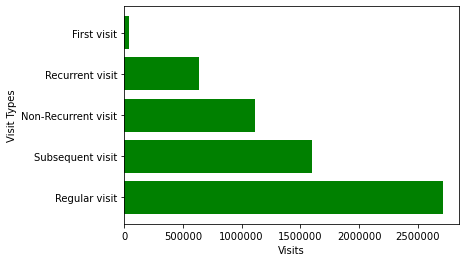


Regular Visiters are the highest visiters of all the visiting-customers.



In [ ]:
X=list(dict(final_data_model_cust_optimised['Visit_Segment'].value_counts()).keys())
Y=list(dict(final_data_model_cust_optimised['Visit_Segment'].value_counts()).values())

fig,ax = plt.subplots()
ax.ticklabel_format(style='plain')

ax.barh(X , Y,color='green')
plt.xlabel("Visits")
plt.ylabel("Visit Types")
plt.show()
# Insights-->
insights_ca1_q4='''
Regular Visiters are the highest visiters of all the visiting-customers.
'''
print(insights_ca1_q4)

In [ ]:
memory_eating(final_data_model_cust_optimised)

memory usage --->1.13 GB


#### 5. Create a variable as Customer Segment ( based on customer total sales to compare with stores average sales)

In [ ]:
fdc=final_data_model_cust_optimised.copy()

In [ ]:
# ---->here by applying 'nunique()' we are not able to get the unique count of stores but we can clearly see that there are 
# 81 unique objects
# -------------------------------------------------------------------------------
# Categories (81, object): ['Acme Fresh Market ', 'Amigo Supermarkets ', 'Big Y ', 'Buehler's ', ..., 
# 'Westborn Market ', 'Western Beef ', 'Woodman's Food Market ', 'Yoke's Fresh Market ']>
# ---------------------------------------------------------------------------------
# final_data_model_cust1['STORE_NAME'].unique

# creating individual tables x and y as per requirements for further merger with the main table 'fdc'
# Note-->(y->for cusromer)  and   (x->for store) 
fdc['cust_total_spent'].mean()
x=fdc.groupby(by='STORE_NAME').agg({'sales_INR':'mean'}).fillna(0).reset_index()
x.rename(columns={'sales_INR':'avg_store_sales'},inplace=True)
print("store_sum_sales = ",x['avg_store_sales'].sum())
print(x)
y=fdc.groupby(by='customer_name').agg({'sales_INR':'sum'}).fillna(0).reset_index()
y.rename(columns={'sales_INR':'customer_sales'},inplace=True)
print("customer_sum_sales = ",y['customer_sales'].sum())
print(y)

store_sum_sales =  8720.173
                STORE_NAME  avg_store_sales
0       Acme Fresh Market          0.000000
1      Amigo Supermarkets          0.000000
2                   Big Y        969.461670
3               Buehler's          0.000000
4             Caraluzzi's        964.462463
..                     ...              ...
76  United Grocery Outlet          0.000000
77        Westborn Market          0.000000
78           Western Beef        967.921814
79  Woodman's Food Market          0.000000
80    Yoke's Fresh Market          0.000000

[81 rows x 2 columns]
customer_sum_sales =  5818012700.0
          customer_name  customer_sales
0           Aaron Acuff   232739.250000
1          Aaron Chavez   102134.648438
2        Aaron Costello    73664.179688
3        Aaron Coulston    63791.410156
4         Aaron Crumble    97032.187500
...                 ...             ...
37740    Zulema Marceau    17356.060547
37741       Zulema Renn   381221.125000
37742       Zulema Roan   

In [ ]:
# Merging both tables x & y individually with fdc table to get those columns
fdc1=pd.merge(left=fdc,right=x,on='STORE_NAME',how='left')
fdc1_opt=fdc1.copy()
my_optimisation(fdc1_opt)
fdc2=pd.merge(left=fdc1_opt,right=y,on='customer_name',how='left')
fdc2_opt=fdc2.copy()
my_optimisation(fdc2_opt)
# fdc2_opt.columns

In [ ]:
memory_eating(fdc1_opt)
memory_eating(fdc2_opt)
fdc2_opt.columns

memory usage --->1.16 GB
memory usage --->1.18 GB


Index(['CUSTOMER_ID', 'State_x', 'PROD_CAT', 'PROD_ID', 'VISIT_YEAR',
       'VISIT_MONTH', 'CNT', 'ORDER_QTY', 'Gender', 'E_Mail', 'Date_of_Birth',
       'SSN', 'Phone_No', 'STATE_NAME', 'State_y', 'Zip', 'Region', 'STORE_ID',
       'STORE_REG_DATE', 'cleaned_DOB', 'Customer_Age', 'Age_Bucket',
       'Relationship_Age', 'AON', 'PRODUCT', 'CATEGORY', 'SUB_CATEGORY',
       'BRAND', 'SALE_PRICE_INR', 'SALE_PRICE_USD', 'MARKET_PRICE',
       'MARKET_USD', 'TYPE', 'RATING', 'DESCRIPTION', 'RAND_NO', 'CAT',
       'PD_ID', 'PRICE_YEAR', 'COST_PRICE_INR', 'COST_PRICE_USD', 'STORE_NAME',
       'PROVINCE', 'STORE_INC_DATE', 'STORE_SIZE_SQ_FT', 'NO_OF_STAFFS',
       'STORE_SIZE', 'STORE_AGE', 'STORE TYPE', 'sales_INR', 'customer_name',
       'cust_unique_visited_months', 'cust_total_visited_months',
       'cust_total_visits', 'cust_total_spent', 'Visit_Segment',
       'avg_store_sales', 'customer_sales'],
      dtype='object')

In [ ]:
fdc1_opt['avg_store_sales'].sum()/10**9
fdc2_opt['customer_sales'].sum()/10**9
fdc2_opt['sales_INR'].sum()/10**9

5.81801472

In [ ]:
# 5. Create a variable as Customer Segment ( based on customer total sales to compare with stores average sales)
# • If the customer total sales >= store avg sales*1.25 (Premier)
# • If the customer total sales >= store avg sales (Power)
# • If the customer total sales >= .50*store avg sales (Advanced)
# • If the customer total sales < .50*store avg sales (Need-Base)
# Note-->(customer_sales->customer total sales)  and   (avg_store_sales->store avg sales) 
customer_Segment_conditions=[fdc2_opt['avg_store_sales']>=fdc2_opt['customer_sales']*1.25,
                            fdc2_opt['avg_store_sales']>=fdc2_opt['customer_sales'],
                            fdc2_opt['avg_store_sales']>=fdc2_opt['customer_sales']*0.5,
                            fdc2_opt['avg_store_sales']<fdc2_opt['customer_sales']*0.5]
customer_Segment_values=['Premier','Power','Advanced','Need-Base']
fdc2_opt['Customer_Segment']=np.select(customer_Segment_conditions,customer_Segment_values,'None')
fdc2_opt['Customer_Segment']=fdc2_opt['Customer_Segment'].astype('category')
fdc2_opt['Customer_Segment'].value_counts()

Need-Base    6105814
Advanced         366
Premier          117
Power             27
Name: Customer_Segment, dtype: int64

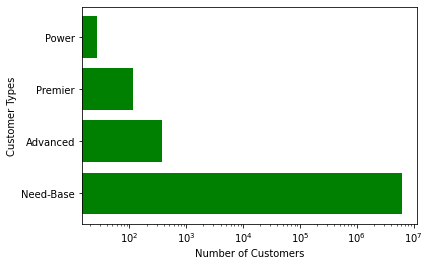


Since last 2 years the company has been dominated by Need-based typres of customers.


In [ ]:
ca_q5_X=list(dict(fdc2_opt['Customer_Segment'].value_counts()).keys())
ca_q5_Y=list(dict(fdc2_opt['Customer_Segment'].value_counts()).values())

fig,ax = plt.subplots()
ax.ticklabel_format(style='plain')

ax.barh(ca_q5_X , ca_q5_Y,color='green',log=True)
plt.xlabel("Number of Customers")
plt.ylabel("Customer Types")
plt.show()

# Insights-->
insights_ca1_q5='''
Since last 2 years the company has been dominated by Need-based typres of customers.'''
print(insights_ca1_q5)

In [ ]:
fdc2_opt.dtypes
memory_eating(fdc2_opt)

memory usage --->1.19 GB


#### 6. Create a new variable as Customer_Type

In [ ]:
# Dropping one of the same-type columns in-order to avoid multicollinearity. I know a statistical concept but this 
# step will contribute in future Machine learning model building

# Note:'Dropping' can only happen once for specified columns. So the next dropping will cause an error due to use 
# of 'inplace=True'
fdc2_opt.drop('State_y',axis=1,inplace=True)
fdc2_opt.rename(columns={'State_x':'State'},inplace=True)

In [ ]:
memory_eating(fdc2_opt)       # we have saved 0.01 GB by just dropping one duplicate column

memory usage --->1.18 GB


In [ ]:
# 6. Create a new variable as Customer_Type
# • Visit Segment=‘Regular visit’ and Customer Segment=‘Premier’ then Customer_Type= ‘a1.Bonafied’
# • Visit Segment=‘Regular visit’ and Customer Segment=‘Power’ then Customer_Type= ’a1.Bonafied’
# • Visit Segment=‘Regular visit’ and Customer Segment=‘Advanced’ then Customer_Type= ‘a2.Loyal’
# • Visit Segment=‘Regular visit’ and Customer Segment=‘Need-Base’ then Customer_Type= ‘a3.Power’
# • Visit Segment=‘Subsequent visit’ and Customer Segment=‘Premier’ then Customer_Type= ‘a1.Bonafied’
# • Visit Segment=‘Subsequent visit’ and Customer Segment=‘Power’ then Customer_Type= ‘a2.Loyal’
# • Visit Segment=‘Subsequent visit’ and Customer Segment=‘Advanced’ then Customer_Type= ‘a3.Power’
# • Visit Segment=‘Subsequent visit’ and Customer Segment=‘Need-Base’ then Customer_Type= ‘a4.Advanced’
# • Visit Segment=‘Recurrent visit’ and Customer Segment=‘Premier’ then Customer_Type= ‘a2.Loyal’
# • Visit Segment=‘Recurrent visit’ and Customer Segment=‘Power’ then Customer_Type= ‘a3.Power’
# • Visit Segment=‘Recurrent visit’ and Customer Segment=‘Advanced’ then Customer_Type= ‘a4.Advanced’
# • Visit Segment=‘Recurrent visit’ and Customer Segment=‘Need-Base’ then Customer_Type= ‘a5.Impulsive’
# • Visit Segment=‘Non-Recurrent visit’ and Customer Segment=‘Premier’ then Customer_Type= ‘a3.Power’
# • Visit Segment=‘Non-Recurrent visit’ and Customer Segment=‘Power’ then Customer_Type= ‘a4.Advance’
# • Visit Segment=‘Non-Recurrent visit’ and Customer Segment=‘Advanced’ then Customer_Type= ‘a5.Impulsive’
# • Visit Segment=‘Non-Recurrent visit’ and Customer Segment=‘Need-Base’ then Customer_Type= ‘a6.Casual’
# • Visit Segment=‘First visit’ and Customer Segment=‘Premier’ then Customer_Type= ‘a4.Advance’
# • Visit Segment=‘First visit’ and Customer Segment=‘Power’ then Customer_Type= ‘a5.Impulsive’
# • Visit Segment=‘First visit’ and Customer Segment=‘Advanced’ then Customer_Type= ‘a6.Casual’
# • Visit Segment=‘First visit’ and Customer Segment=‘Need-Base’ then Customer_Type= ‘a6.Casual’

In [ ]:
# Creating the required column i.e. 'Customer_Type'
customer_type_conditions=[(fdc2_opt['Visit_Segment']=='Regular visit')&(fdc2_opt['Customer_Segment']=='Premier'),
                         (fdc2_opt['Visit_Segment']=='Regular visit')&(fdc2_opt['Customer_Segment']=='Power'),
                         (fdc2_opt['Visit_Segment']=='Regular visit')&(fdc2_opt['Customer_Segment']=='Advanced'),
                         (fdc2_opt['Visit_Segment']=='Regular visit')&(fdc2_opt['Customer_Segment']=='Need-Base'),
                         (fdc2_opt['Visit_Segment']=='Subsequent visit')&(fdc2_opt['Customer_Segment']=='Premier'),
                         (fdc2_opt['Visit_Segment']=='Subsequent visit')&(fdc2_opt['Customer_Segment']=='Power'),
                         (fdc2_opt['Visit_Segment']=='Subsequent visit')&(fdc2_opt['Customer_Segment']=='Advanced'),
                         (fdc2_opt['Visit_Segment']=='Subsequent visit')&(fdc2_opt['Customer_Segment']=='Need-Base'),
                         (fdc2_opt['Visit_Segment']=='Recurrent visit')&(fdc2_opt['Customer_Segment']=='Premier'),
                         (fdc2_opt['Visit_Segment']=='Recurrent visit')&(fdc2_opt['Customer_Segment']=='Power'),
                         (fdc2_opt['Visit_Segment']=='Recurrent visit')&(fdc2_opt['Customer_Segment']=='Advanced'),
                         (fdc2_opt['Visit_Segment']=='Recurrent visit')&(fdc2_opt['Customer_Segment']=='Need-Base'),
                         (fdc2_opt['Visit_Segment']=='Non-Recurrent visit')&(fdc2_opt['Customer_Segment']=='Premier'),
                         (fdc2_opt['Visit_Segment']=='Non-Recurrent visit')&(fdc2_opt['Customer_Segment']=='Power'),
                         (fdc2_opt['Visit_Segment']=='Non-Recurrent visit')&(fdc2_opt['Customer_Segment']=='Advanced'),
                         (fdc2_opt['Visit_Segment']=='Non-Recurrent visit')&(fdc2_opt['Customer_Segment']=='Need-Base'),
                         (fdc2_opt['Visit_Segment']=='First visit')&(fdc2_opt['Customer_Segment']=='Premier'),
                         (fdc2_opt['Visit_Segment']=='First visit')&(fdc2_opt['Customer_Segment']=='Power'),
                         (fdc2_opt['Visit_Segment']=='First visit')&(fdc2_opt['Customer_Segment']=='Advanced'),
                         (fdc2_opt['Visit_Segment']=='First visit')&(fdc2_opt['Customer_Segment']=='Need-Base'),]
customer_type_values=['a1.Bonafied','a1.Bonafied','a2.Loyal','a3.Power','a1.Bonafied',
                      'a2.Loyal','a3.Power','a4.Advanced','a2.Loyal',
                      'a3.Power','a4.Advanced','a5.Impulsive','a3.Power',
                      'a4.Advanced','a5.Impulsive','a6.Casual','a4.Advanced',
                      'a5.Impulsive','a6.Casual','a6.Casual']
fdc2_opt['Customer_Type']=np.select(customer_type_conditions,customer_type_values,'None')
fdc2_opt['Customer_Type']=fdc2_opt['Customer_Type'].astype('category')
fdc2_opt['Customer_Type'].value_counts()


a3.Power        2715250
a4.Advanced     1601978
a6.Casual       1152072
a5.Impulsive     637024
Name: Customer_Type, dtype: int64


The 'Power' customers have the largest share among other customer types.



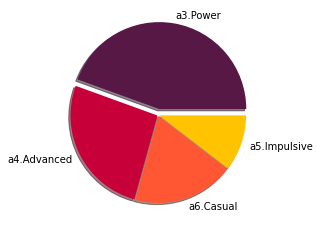

In [ ]:
# Used Pie chart
ca_q6_X=list(dict(fdc2_opt['Customer_Type'].value_counts()).keys())
ca_q6_Y=list(dict(fdc2_opt['Customer_Type'].value_counts()).values())

plt.pie(ca_q6_Y,labels=ca_q6_X,explode=[0.07,.01,0.01,0.01],shadow=True,colors=["#581845","#C70039",
                                                                               "#FF5733","#FFC300"])
# Insights-->
insights_ca1_q6='''
The 'Power' customers have the largest share among other customer types.
'''
print(insights_ca1_q6)

plt.show()

In [ ]:
##### memory_eating(fdc2_opt)
# fdc2.dtypes

#### 7. Get Customer_Type wise unique count of customers, total_visits, total_spent , spent_per_month, spent_per_visit


In [ ]:
customer_type_wise_stats=fdc2_opt.groupby(by=['Customer_Type'],as_index=False).agg({'CUSTOMER_ID':['nunique','count'],
                                        'sales_INR':'sum'})

# Redefining the columns to remove the multi-index phenomenon which happened due to use of multiple aggregate functions 
# on a single column i.e. VISIT_MONTH-->'nunique' and 'count'
customer_type_wise_stats.columns=[''.join(cols) for cols in customer_type_wise_stats.columns.values]

# renaming the columns into suitable names for proper naming conventions
customer_type_wise_stats.rename(columns={'CUSTOMER_IDnunique':'unique_customers','CUSTOMER_IDcount':'total_visits',
                                        'sales_INRsum':'total_spent'},inplace=True)
# Insights-->
insights_ca1_q7='''
The 'casual' customers are the most unique ones whereas 'power' customers were the most
frequently visiting ones therefore they purchased the most.
'''
print(insights_ca1_q7)
customer_type_wise_stats
# Insights--> 


The 'casual' customers are the most unique ones whereas 'power' customers were the most
frequently visiting ones therefore they purchased the most.



,Customer_Type,unique_customers,total_visits,total_spent
0,a3.Power,8092,2715250,2.588976e+09
1,a4.Advanced,6412,1601978,1.524399e+09
2,a5.Impulsive,4229,637024,6.094226e+08
3,a6.Casual,19025,1152072,1.095214e+09


#### 8. Get AGE_BUCKET and Customer_Type wise unique count of customers, total_visits, total_spent , spent_per_month, spent_per_visit


In [ ]:
# Note: 'ag_ct' means 'AGE_BUCKET and Customer_Type wise'
ag_ct_wise_stats=fdc2_opt.groupby(by=['Age_Bucket','Customer_Type'],as_index=False).agg({'CUSTOMER_ID':['nunique','count'],
                                                'sales_INR':'sum'})

# Redefining the columns to remove the multi-index phenomenon which happened due to use of multiple aggregate functions 
# on a single column i.e. VISIT_MONTH-->'nunique' and 'count'
ag_ct_wise_stats.columns=[''.join(cols) for cols in ag_ct_wise_stats.columns.values]

# renaming the columns into suitable names for proper naming conventions
ag_ct_wise_stats.rename(columns={'CUSTOMER_IDnunique':'unique_customers','CUSTOMER_IDcount':'total_visits',
                                        'sales_INRsum':'total_spent'},inplace=True)

## making a formatted spent_amount column to make it more readable

ag_ct_wise_stats
# customer_type_wise_stats.dtypes
# customer_type_wise_stats.info(verbose=False)

,Age_Bucket,Customer_Type,unique_customers,total_visits,total_spent
0,A1.YOUNG-AGE,a3.Power,1371,461633,440587680.0
1,A1.YOUNG-AGE,a4.Advanced,1073,270093,258115824.0
2,A1.YOUNG-AGE,a5.Impulsive,716,108818,103854592.0
3,A1.YOUNG-AGE,a6.Casual,3233,197630,190049104.0
4,A2.MID-YOUNG-AGE,a3.Power,2063,693199,660200512.0
5,A2.MID-YOUNG-AGE,a4.Advanced,1645,413864,394244160.0
6,A2.MID-YOUNG-AGE,a5.Impulsive,1102,165433,158120464.0
7,A2.MID-YOUNG-AGE,a6.Casual,4888,296279,282827776.0
8,A3.MID-AGE,a3.Power,2128,716832,682745408.0
9,A3.MID-AGE,a4.Advanced,1684,420201,400290112.0


In [ ]:
# Spending age groups
Most_spending=ag_ct_wise_stats.groupby(by="Age_Bucket").agg({'total_spent':'sum'}).reset_index().sort_values(by='total_spent',ascending=False)
Most_spending['total_spent_billions']=round(Most_spending['total_spent']/10**9,1)
# Insights-->
insights_ca1_q8='''
Mid-Age groups are the most spending groups and Old-Age and Young-Age groups are the least spending groups
'''
print(insights_ca1_q8)
Most_spending


Mid-Age groups are the most spending groups and Old-Age and Young-Age groups are the least spending groups



,Age_Bucket,total_spent,total_spent_billions
2,A3.MID-AGE,1.522019e+09,1.5
1,A2.MID-YOUNG-AGE,1.495393e+09,1.5
3,A4.MID-OLD-AGE,1.476719e+09,1.5
0,A1.YOUNG-AGE,9.926072e+08,1.0
4,A5.OLD-AGE,3.312742e+08,0.3


In [ ]:
memory_eating(fdc2_opt)

memory usage --->1.19 GB


### CUSTOMER ANALYTICS PART-2

In [ ]:
# 1. Get Customer who repeats the same brand and product buying more than 6 times in a year

# fdc2_opt[['customer_name','VISIT_YEAR','BRAND']]

cust_brand=fdc2_opt.groupby(by=['customer_name','VISIT_YEAR']).agg({'BRAND':'count'}).reset_index()
cust_brand.rename(columns={'BRAND':'Brand_buying_count'},inplace=True)
cust_brand[cust_brand['Brand_buying_count']>=6]['customer_name'].count() #----count of such customers =68251

# Insights
print("% of customers buying same brand more than 6 times in a year = ", 
      round((cust_brand[cust_brand['Brand_buying_count']>=6]['customer_name'].count()/cust_brand['customer_name'].count())*100),
     "%")

% of customers buying same brand more than 6 times in a year =  90 %


In [ ]:
# 2. Get the month name in a year where customer did highest purchase
# 3. Get the month name in a year where customer did lowest purchase

# fdc2_opt[['VISIT_MONTH','customer_sales']]

monthly_sales=fdc2_opt.groupby(by=['VISIT_MONTH']).agg({'sales_INR':'sum'}).reset_index()
monthly_sales.rename(columns={'sales_INR':'monthly_sales','VISIT_MONTH':'Month'},inplace=True)
monthly_sales['sales_(in millions)']=monthly_sales['monthly_sales']/10**6

# Creating a month_name column to reduce the table ambiguity
monthly_sales_conditions=[monthly_sales['Month']==1,monthly_sales['Month']==2,
            monthly_sales['Month']==3,monthly_sales['Month']==4,monthly_sales['Month']==5,
            monthly_sales['Month']==6,monthly_sales['Month']==7,monthly_sales['Month']==8,
            monthly_sales['Month']==9,monthly_sales['Month']==10,monthly_sales['Month']==11,
            monthly_sales['Month']==12]
monthly_sales_values=['January','February','March','April','May','June','July',
                         'August','September','October','November','December']
monthly_sales['Month_Name']=np.select(monthly_sales_conditions,monthly_sales_values,'None')

## Finding the highest selling month
highest_sold_month=monthly_sales.loc[monthly_sales['sales_(in millions)']==monthly_sales['sales_(in millions)'].max(),:]['Month_Name']
print(f"{highest_sold_month[list(highest_sold_month.index)[0]]} is the highest selling month.\n")

## Finding the lowest selling month
lowest_sold_month=monthly_sales.loc[monthly_sales['sales_(in millions)']==monthly_sales['sales_(in millions)'].min(),:]['Month_Name']

# Insights
print(f"{lowest_sold_month[list(lowest_sold_month.index)[0]]} is the lowest selling month.")

## Note:here during printing, we have first found the index object of the lowest or highest selling month and then
##      we have converted that index object into a list and then we have found the first element of that list
##     by indexing at 0(zero) which is the index of the desired month_name itself. 
monthly_sales

January is the highest selling month.

July is the lowest selling month.


,Month,monthly_sales,sales_(in millions),Month_Name
0,1,489714144.0,489.714144,January
1,2,485931200.0,485.931200,February
2,3,488791904.0,488.791904,March
3,4,482345792.0,482.345792,April
4,5,482547584.0,482.547584,May
5,6,486511904.0,486.511904,June
6,7,480536352.0,480.536352,July
7,8,483822336.0,483.822336,August
8,9,481577024.0,481.577024,September
9,10,485783680.0,485.783680,October


In [ ]:
## 4. Get Month wise customer spent to 2 categories (Premier and Non-Premier)
## • If customer Spent above average spent in the same month is called Premier else Non-Premier

month_cust_spent=fdc2_opt.groupby(by=['VISIT_MONTH','customer_name']).agg({'sales_INR':'sum'}).reset_index()
month_cust_spent.rename(columns={'VISIT_MONTH':'Month','sales_INR':'spent'},inplace=True)

## finding the avg_spent column
month_cust_spent['avg_spent']=month_cust_spent['spent'].mean()

## Let's categorise the customers
month_cust_spent['customer_category']=np.where(month_cust_spent['spent']>month_cust_spent['avg_spent'],
                                    'Premier','Non-Premier')
month_cust_spent['customer_category_flag']=np.where(month_cust_spent['customer_category']=='Premier',1,0)

month_cust_spent.head()
## month_cust_spent['customer_category'].value_counts()

,Month,customer_name,spent,avg_spent,customer_category,customer_category_flag
0,1,Aaron Acuff,0.000000,12845.067383,Non-Premier,0
1,1,Aaron Chavez,7537.000000,12845.067383,Non-Premier,0
2,1,Aaron Costello,23910.750000,12845.067383,Premier,1
3,1,Aaron Coulston,0.000000,12845.067383,Non-Premier,0
4,1,Aaron Crumble,23900.669922,12845.067383,Premier,1


In [ ]:
## 5. Get customers who are 6 times showing premier behavior in last 12 months
last_12_months_data_x=fdc2_opt.loc[fdc2_opt['VISIT_YEAR']==fdc2_opt['VISIT_YEAR'].max()]
last_12_months_data=last_12_months_data_x.groupby(by=['VISIT_MONTH',
                    'customer_name']).agg({'sales_INR':'sum'}).reset_index()
last_12_months_data.rename(columns={'VISIT_MONTH':'Month','sales_INR':'spent'},inplace=True)

## finding the avg_spent column
last_12_months_data['avg_spent']=last_12_months_data['spent'].mean()

## Let's categorise the customers
last_12_months_data['customer_category']=np.where(last_12_months_data['spent']>last_12_months_data['avg_spent'],
                                    'Premier','Non-Premier')
last_12_months_data['customer_category_flag']=np.where(last_12_months_data['customer_category']=='Premier',1,0)

last_12_months_data

## Now let's begin the question
Q5_month_cust_spent=last_12_months_data.groupby(['customer_name'],
                                                as_index=False).agg({'customer_category_flag':'sum'})
Q5_month_cust_spent
Q5_month_cust_spent.rename(columns={'customer_category_flag':'six_timer_visiters'},inplace=True)

# Q5_month_cust_spent['customer_category_flag'].value_counts()
Q5_month_cust_spent_x=Q5_month_cust_spent[Q5_month_cust_spent['six_timer_visiters']==6] #--->only 3257 customers

# insights
print(f"There are {Q5_month_cust_spent_x['customer_name'].count()} who are 6 times showing premier behavior in last 12 months ")

Q5_month_cust_spent_x

There are 3257 who are 6 times showing premier behavior in last 12 months 


,customer_name,six_timer_visiters
13,Aaron Pellegrini,6
22,Abbie Edmunds,6
30,Abby Staton,6
39,Abdul Steve,6
43,Abe Alm,6
...,...,...
37636,Zaida Braswell,6
37691,Zetta Amundsen,6
37700,Zita Schoolcraft,6
37713,Zola Critchlow,6


In [ ]:
# Just comparing the count of records in last_12_months vs entire_2_years
last_12_months_data['Month'].count()
# fdc2_opt[['customer_name','BRAND','PRODUCT']].count()

452940

In [ ]:
import sqlalchemy
from sqlalchemy import create_engine
engine=create_engine('mssql://BLAZE-666/retail_biz?driver=SQL Server Native Client 11.0')

In [ ]:
# 6. Get customers wise repeated brand and product name purchased 10 times in last 12 months

# By writting a sql querry it can be seen that there are no customers in last 12 months who have 
# purchased the same brand and product repeatedly 10 times 
query1='''select
customer_name,brand,product,
COUNT(1) as count_x
from customer_analysis2_Q6
where (brand is not null) and (product is not null)
group by customer_name,brand,product
having COUNT(1)>=10
order by 1'''
Q6_1=pd.read_sql_query(query1,con=engine)

print(f"{Q6_1.customer_name.count()} customers have purchased a branded product 10 times repeatedly in last 12 months 😒")                              #------>NO CUSTOMERS 😒
Q6_1

0 customers have purchased a branded product 10 times repeatedly in last 12 months 😒


,customer_name,brand,product,count_x


In [ ]:
# Number of Customers buying same brand and product more than once
query2='''select
customer_name,brand,product,
COUNT(1) as count_x
from customer_analysis2_Q6
where (brand is not null) and (product is not null)
group by customer_name,brand,product
having COUNT(1)>1
order by 1'''
# {'{:,.0f} Million'.format(total_quantity_sold/10**6)}
# Insights
Q6_2=pd.read_sql_query(query2,con=engine)   #------>32,168 CUSTOMERS 😀       
print(f"percentage of customers buying more one product and brand more than one time ={round((Q6_2['customer_name'].count()/last_12_months_data['Month'].count())*100,2)} %  -->😀")
print(f"{'{:.0f}'.format(Q6_2['customer_name'].count())}, customers have purchased a branded product 10 times repeatedly in last 12 months  -->😀")
Q6_2 .head()

percentage of customers buying more one product and brand more than one time =7.1 %  -->😀
32169, customers have purchased a branded product 10 times repeatedly in last 12 months  -->😀


,customer_name,brand,product,count_x
0,Aaron Acuff,Bella,Panty Liners - Intima Plus Normal,2
1,Aaron Crumble,Natures Essence,Aloevera Moisturising Beauty Gel,2
2,Aaron Crumble,Dove,Dryness Care Conditioner,2
3,Aaron Ferraro,Cherry Blossom,Liquid Shoe Polish - Black,2
4,Aaron Ferraro,Mamaearth,Anti Dandruff Conditioner - With Tea Tree & Gi...,2


In [ ]:
fdc2_opt.columns

Index(['CUSTOMER_ID', 'State', 'PROD_CAT', 'PROD_ID', 'VISIT_YEAR',
       'VISIT_MONTH', 'CNT', 'ORDER_QTY', 'Gender', 'E_Mail', 'Date_of_Birth',
       'SSN', 'Phone_No', 'STATE_NAME', 'Zip', 'Region', 'STORE_ID',
       'STORE_REG_DATE', 'cleaned_DOB', 'Customer_Age', 'Age_Bucket',
       'Relationship_Age', 'AON', 'PRODUCT', 'CATEGORY', 'SUB_CATEGORY',
       'BRAND', 'SALE_PRICE_INR', 'SALE_PRICE_USD', 'MARKET_PRICE',
       'MARKET_USD', 'TYPE', 'RATING', 'DESCRIPTION', 'RAND_NO', 'CAT',
       'PD_ID', 'PRICE_YEAR', 'COST_PRICE_INR', 'COST_PRICE_USD', 'STORE_NAME',
       'PROVINCE', 'STORE_INC_DATE', 'STORE_SIZE_SQ_FT', 'NO_OF_STAFFS',
       'STORE_SIZE', 'STORE_AGE', 'STORE TYPE', 'sales_INR', 'customer_name',
       'cust_unique_visited_months', 'cust_total_visited_months',
       'cust_total_visits', 'cust_total_spent', 'Visit_Segment',
       'avg_store_sales', 'customer_sales', 'Customer_Segment',
       'Customer_Type'],
      dtype='object')

In [ ]:
# 7. Get Customer_Type and Age Bucket wise count of unique customer base and their total_spent
# 8. Get Customer_Type and Age Bucket wise count of unique customer base in % and their total_spent %
Q7_ct_ab=fdc2_opt.groupby(by=['Customer_Type','Age_Bucket'],as_index=False).agg({'customer_name':'nunique',
                                                                    'sales_INR':'sum'})
Q7_ct_ab.rename(columns={'customer_name':'unique_customers','sales_INR':'total_spent'},inplace=True)

# calculating the percentages for Q8
Q7_ct_ab['%_unique_customers']=pd.Series([round(i/(Q7_ct_ab['unique_customers'].sum())*100,2) for i in list(Q7_ct_ab.loc[:,'unique_customers'])])
Q7_ct_ab['%_total_spent']=pd.Series([round(i/(Q7_ct_ab['total_spent'].sum())*100,2) for i in list(Q7_ct_ab.loc[:,'total_spent'])])

Q7_ct_ab.sort_values(by=['%_total_spent',"%_unique_customers"],ascending=[False,False])

,Customer_Type,Age_Bucket,unique_customers,total_spent,%_unique_customers,%_total_spent
2,a3.Power,A3.MID-AGE,2128,682745408.0,5.64,11.74
1,a3.Power,A2.MID-YOUNG-AGE,2063,660200512.0,5.46,11.35
3,a3.Power,A4.MID-OLD-AGE,2063,658001728.0,5.46,11.31
0,a3.Power,A1.YOUNG-AGE,1370,440587680.0,3.63,7.57
7,a4.Advanced,A3.MID-AGE,1684,400290112.0,4.46,6.88
6,a4.Advanced,A2.MID-YOUNG-AGE,1645,394244160.0,4.36,6.78
8,a4.Advanced,A4.MID-OLD-AGE,1640,384529760.0,4.34,6.61
16,a6.Casual,A2.MID-YOUNG-AGE,4888,282827776.0,12.95,4.86
18,a6.Casual,A4.MID-OLD-AGE,4906,278824576.0,12.99,4.79
17,a6.Casual,A3.MID-AGE,4853,278477120.0,12.85,4.79


### PRODUCT ANALYTICS

In [ ]:
# 1. Get Category wise unique count of customer base , total orders and total sales

pa_Q1=fdc2_opt.groupby(by=['CATEGORY'],as_index=False).agg({'customer_name':'nunique',
                                                      'CUSTOMER_ID':'count',
                                                      'sales_INR':'sum'})
pa_Q1.rename(columns={'customer_name':'unique_customers','CUSTOMER_ID':'total_orders',
                      'sales_INR':'total_sales'},inplace=True)
pa_Q1

,CATEGORY,unique_customers,total_orders,total_sales
0,Baby Care,31058,133627,2.122674e+08
1,"Bakery, Cakes & Dairy",33180,189997,8.144794e+07
2,Beauty & Hygiene,37508,1689807,2.152013e+09
3,Beverages,33458,197404,1.421626e+08
4,Cleaning & Household,36724,597568,3.986815e+08
5,"Eggs, Meat & Fish",27497,83988,7.135434e+07
6,"Foodgrains, Oil & Masala",36676,577856,3.057517e+08
7,Fruits & Vegetables,27501,83591,1.321582e+07
8,Gourmet & World Food,37297,1046646,9.766284e+08
9,"Kitchen, Garden & Pets",37122,787685,1.228294e+09



'Beauty and Hygiene' are the highest selling categories where as 'Fruits and vegetables' are the highest selling categories.



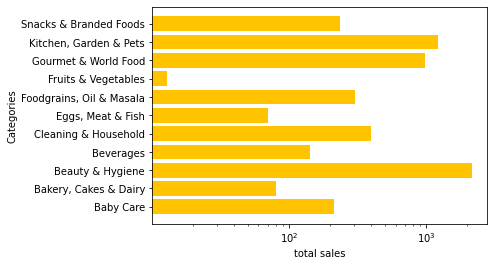

In [ ]:
pa_q1_X=list(pa_Q1['CATEGORY'].unique())
pa_q1_Y=[round(i/10**6) for i in list(pa_Q1['total_sales'].unique())]

fig,ax = plt.subplots()
ax.ticklabel_format(style='plain')

ax.barh(pa_q1_X , pa_q1_Y,color='#FFC300',log=True)
plt.xlabel("total sales")
plt.ylabel("Categories")
# Insights-->
insights_pa_q1='''
'Beauty and Hygiene' are the highest selling categories where as 'Fruits and vegetables' are the highest selling categories.
'''
print(insights_pa_q1)
plt.show()

In [ ]:
# 2. Get Category and Brand wise unique count of customer base , total orders and total sales

pa_Q2=fdc2_opt.groupby(by=['CATEGORY','BRAND']).agg({'customer_name':'nunique',
                                                      'CUSTOMER_ID':'count',
                                                      'sales_INR':'sum'}).reset_index()
pa_Q2.rename(columns={'customer_name':'unique_customers','CUSTOMER_ID':'total_orders',
                      'sales_INR':'total_sales'},inplace=True)
pa_Q2.head()

pa_Q2_x1=pa_Q2.groupby(by=['BRAND']).agg({'total_sales':'sum'}).reset_index()

# Top 5 and Bottom 5 performing brands
# Insights-->
insights_pa_q2='''
'Prestige' is the highest selling brand where as 'Livon' is the lowest selling brand.
'''
print(insights_pa_q2)
pd.concat([pa_Q2_x1.sort_values(by=['total_sales'],ascending=False).head(5),
          pa_Q2_x1.sort_values(by=['total_sales'],ascending=False).tail(5)],axis=0).reset_index().drop('index',axis=1)



'Prestige' is the highest selling brand where as 'Livon' is the lowest selling brand.



,BRAND,total_sales
0,Prestige,116677224.0
1,BB Home,68406328.0
2,bb Royal,67237024.0
3,Hawkins,64740428.0
4,Dkny,61016924.0
5,Narasus,6480.0
6,Polo,6420.0
7,Center Fruit,5670.0
8,Dream Bake,5340.0
9,Livon,3558.0


In [ ]:
# 3. Get Category wise Brand sales in ranking and select top 10 brands and their market share in %
pa_Q3=fdc2_opt.groupby(by=['CATEGORY','BRAND']).agg({'sales_INR':'sum'}).reset_index()
pa_Q3.rename(columns={'sales_INR':'total_sales'},inplace=True)
pa_Q3

pa_Q3['%market_share']=pd.Series([round(i/(pa_Q3['total_sales'].sum())*100,2) for i in list(pa_Q3.loc[:,'total_sales'])])
pa_Q3['rankings']=pa_Q3['%market_share'].rank(method='dense',ascending=False)
pa_Q3_f=pa_Q3[pa_Q3['rankings'].isin(range(1,11))].sort_values(by='rankings').reset_index().drop('index',axis=1)

# Insights-->
insights_pa_q3='''
Brands like 'Prestige' & 'Hawkins' (under category 'Kitchen,Garden & Pets') have the highest market share.
'''
print(insights_pa_q3)
pa_Q3_f.sort_values(by=['%market_share'],ascending=False)


Brands like 'Prestige' & 'Hawkins' (under category 'Kitchen,Garden & Pets') have the highest market share.



,CATEGORY,BRAND,total_sales,%market_share,rankings
0,"Kitchen, Garden & Pets",Prestige,115637744.0,1.99,1.0
1,"Kitchen, Garden & Pets",Hawkins,64740428.0,1.11,2.0
2,"Foodgrains, Oil & Masala",bb Royal,64259264.0,1.10,3.0
3,Beauty & Hygiene,Dkny,61016924.0,1.05,4.0
4,Beauty & Hygiene,Ajmal,54218820.0,0.93,5.0
5,"Kitchen, Garden & Pets",BB Home,54351640.0,0.93,5.0
6,"Kitchen, Garden & Pets",Corelle,48000876.0,0.83,6.0
7,Beauty & Hygiene,StBotanica,46865792.0,0.81,7.0
8,Baby Care,Pampers,41449856.0,0.71,8.0
9,Beauty & Hygiene,Police,39540596.0,0.68,9.0


In [ ]:
# 4. Get Category, Brand and Product wise sales in descending order

# I have done only product wise sales b/c the system wasn't summarizing that much data and gave a 'memory allocation error'
pa_Q4=fdc2_opt.groupby(by=['PRODUCT']).agg({'sales_INR':'sum'}).reset_index()
pa_Q4.rename(columns={'sales_INR':'total_sales'},inplace=True)
pa_Q4['rankings']=pa_Q3['total_sales'].rank(method='dense',ascending=False)
pa_Q4.sort_values(by='total_sales',ascending=False)

# top 10 selling products
pa_Q4_top_10=pa_Q4[pa_Q4['rankings'].isin(range(1,11))].sort_values(by='rankings').reset_index().drop('index',axis=1)
pa_Q4_top_10

,PRODUCT,total_sales,rankings
0,Value Pack - Cranberry Almond Crisps + Almond ...,252787.000000,1.0
1,"Tiffin - Stylo Hot Executive, Evening Pista",281074.000000,2.0
2,Perfume Body Spray - Tag Her For Women,294025.000000,3.0
3,"Cooking Paste - Butter Chicken, Easy to Cook, ...",101317.500000,4.0
4,Sugar Free Sweets - Mysore Pa,189875.000000,5.0
5,Coco Peat,24075.000000,6.0
6,Sweets Love Candy - Lychee Flavoured,26560.000000,7.0
7,"Dough Art - Creative Modelling, Assorted",109956.000000,8.0
8,Ayurveda Clear Skin Soap,66063.359375,9.0
9,Dill Tzatziki,223200.000000,10.0



'Perfume Body Spray-Tag Her For Women' was the highest selling product in all two years.



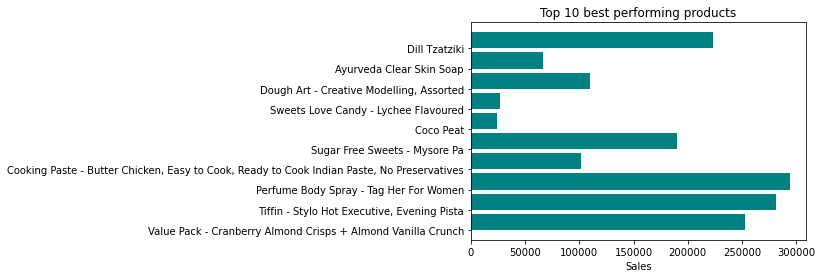

In [ ]:
# Top 10 Products
pa_Q4_X=list(pa_Q4_top_10['PRODUCT'])
pa_Q4_Y=list(pa_Q4_top_10['total_sales'])

fig,ax = plt.subplots()

ax.barh(pa_Q4_X ,pa_Q4_Y,color='#008080',align='edge')
plt.title("Top 10 best performing products")
plt.xlabel("Sales")

# Insights-->
insights_pa_q4='''
'Perfume Body Spray-Tag Her For Women' was the highest selling product in all two years.
'''
print(insights_pa_q4)
plt.show()


In [ ]:
# 5. Get Product_segment based on Category and Brand sales
# • If Brand sales >= 1.25 of Category Avg_sales Then ‘Hi-Tech’
# • If Brand sales >= Category Avg_sales Then ‘Premier’
# • If Brand sales >= .50*Category Avg_sales Then ‘Power’
# • Else ‘Retail’

note_Q5_pa='''
1) I have taken Category sales not category avg_sales because category_avg_sales would produce no segmentations 
   as each the category_avg-sales is greater than each brand_sales.\n
2) But if Business strictly demands the condition then I would definitely apply it but would make no sense.
'''
print(note_Q5_pa)


1) I have taken Category sales not category avg_sales because category_avg_sales would produce no segmentations 
   as each the category_avg-sales is greater than each brand_sales.

2) But if Business strictly demands the condition then I would definitely apply it but would make no sense.



In [ ]:
# Creating the 3 required tables 
category_brand_sales_tab=fdc2_opt.groupby(by=['CATEGORY','BRAND']).agg({'sales_INR':'sum'}).reset_index()
category_brand_sales_tab.rename(columns={'sales_INR':'category_brand_Sales'},inplace=True)

brand_sales_tab=fdc2_opt.groupby(by=['BRAND']).agg({'sales_INR':'sum'}).reset_index()
brand_sales_tab.rename(columns={'sales_INR':'brand_Sales'},inplace=True)

category_sales_tab=fdc2_opt.groupby(by=['CATEGORY']).agg({'sales_INR':'sum'}).reset_index()
category_sales_tab.rename(columns={'sales_INR':'category_Sales'},inplace=True)

# merging all the 3 tables/dataframes
pa_Q5_1=pd.merge(left=category_brand_sales_tab,right=brand_sales_tab,on='BRAND',how='inner')
pa_Q5_2=pd.merge(left=pa_Q5_1,right=category_sales_tab,on='CATEGORY',how='inner')

pa_Q5_2

pa_Q5_2_conditions=[pa_Q5_2['brand_Sales']>=1.25*pa_Q5_2['category_Sales'],
                   pa_Q5_2['brand_Sales']>=pa_Q5_2['category_Sales'],
                  pa_Q5_2['brand_Sales']>=0.5*pa_Q5_2['category_Sales']]
pa_Q5_2_values=['Hi-Tech','Premier','Power']
pa_Q5_2['Product_Segment']=np.select(pa_Q5_2_conditions,pa_Q5_2_values,'Retail')
# pa_Q5_2

# Insights-->
insights_pa_q4='''
Retail brands in the company are the highest ones i.e above 25 thousand.
'''
print(insights_pa_q4)
pa_Q5_2['Product_Segment'].value_counts()


Retail brands in the company are the highest ones i.e above 25 thousand.



Retail     25050
Power        161
Hi-Tech       59
Premier       30
Name: Product_Segment, dtype: int64

In [ ]:
# fdc2_opt[['CATEGORY','BRAND','PRODUCT','sales_INR','customer_name','Customer_Type']].to_csv(r'C:\Users\Hp\OneDrive\Desktop\Power BI\Projects\Retail Business\Analytics Files\prod_details.csv',index=False)
# fdc2_opt.columns

In [ ]:
# 6. Get Category wise Product_segment Brand and its top 10 selling product name
pa_Q6_x_query='''with a as(select *,
ROW_NUMBER() over (partition by category,product_segment,brand order by sales desc) as rn
from pa_Q6_nd_7_x1)
select a.category,a.product_segment,a.brand,a.product,a.sales 
from a where a.rn=1 '''
pa_Q6_x_tab=pd.read_sql_query(pa_Q6_x_query,con=engine)
# pa_Q6_x_tab
pa_Q6_x_top10=pa_Q6_x_tab.sort_values(by='sales',ascending=False).head(10).reset_index().drop('index',axis=1)

pa_Q6_x_top10
# Note:This table contains top 10 top products for each brand,each product_segment and each_category

,category,product_segment,brand,product,sales
0,"Kitchen, Garden & Pets",Retail,Prestige,"Gas Stove-4 Burner Royale Plus Schott Glass, B...",18685664.0
1,"Kitchen, Garden & Pets",Retail,DP,"Premium Cloth Dryer/Drying Stand - Foldable, S...",11492328.0
2,Beauty & Hygiene,Retail,BTN Sports,Whey Protein Powder,9661400.0
3,"Foodgrains, Oil & Masala",Retail,bb Royal,Steam Rice/Akki - Kolam,8661376.0
4,Beauty & Hygiene,Retail,Dkny,Deodorant Body Spray - Be Delicious Woman EDT,8369400.0
5,Gourmet & World Food,Retail,Fragata,Extra Virgin Olive Oil,8183200.0
6,"Kitchen, Garden & Pets",Retail,Wonderchef,"Casserole Set - Die-Cast, Induction Base, Granite",7830000.0
7,"Kitchen, Garden & Pets",Retail,Captain Zack,Barking Up The Tea Tree Anti-Itch Dog Shampoo,7547560.0
8,"Kitchen, Garden & Pets",Retail,Farmina,Pet Food - N&D Team Breeder Puppy Top Farmina,7496870.0
9,Beauty & Hygiene,Retail,Estee Lauder,Perfume - Pure White Linen EDP,7470300.0


In [ ]:
# 7. Get Category wise Product_segment Brand and its top 10 selling product name and 
# their unique count of customer from Customer_Type
pa_Q7=fdc2_opt.groupby(by=['CATEGORY','PRODUCT']).agg({'Customer_Type':'nunique'}).reset_index()
pa_Q7.rename(columns={'CATEGORY':'category','PRODUCT':'product',
                      'Customer_Type':'types_of_customers'},inplace=True)
my_optimisation(pa_Q7)
pa_Q7

# Merging the required tables
pa_Q7_x1=pd.merge(left=pa_Q6_x_top10,right=pa_Q7,on=['category','product'],how='left')
pa_Q7_x1

,category,product_segment,brand,product,sales,types_of_customers
0,"Kitchen, Garden & Pets",Retail,Prestige,"Gas Stove-4 Burner Royale Plus Schott Glass, B...",18685664.0,4
1,"Kitchen, Garden & Pets",Retail,DP,"Premium Cloth Dryer/Drying Stand - Foldable, S...",11492328.0,4
2,Beauty & Hygiene,Retail,BTN Sports,Whey Protein Powder,9661400.0,4
3,"Foodgrains, Oil & Masala",Retail,bb Royal,Steam Rice/Akki - Kolam,8661376.0,4
4,Beauty & Hygiene,Retail,Dkny,Deodorant Body Spray - Be Delicious Woman EDT,8369400.0,4
5,Gourmet & World Food,Retail,Fragata,Extra Virgin Olive Oil,8183200.0,4
6,"Kitchen, Garden & Pets",Retail,Wonderchef,"Casserole Set - Die-Cast, Induction Base, Granite",7830000.0,4
7,"Kitchen, Garden & Pets",Retail,Captain Zack,Barking Up The Tea Tree Anti-Itch Dog Shampoo,7547560.0,4
8,"Kitchen, Garden & Pets",Retail,Farmina,Pet Food - N&D Team Breeder Puppy Top Farmina,7496870.0,4
9,Beauty & Hygiene,Retail,Estee Lauder,Perfume - Pure White Linen EDP,7470300.0,4


In [ ]:
# fdc2_opt[['CATEGORY','BRAND','PRODUCT']]
fdc2_opt.columns

Index(['CUSTOMER_ID', 'State', 'PROD_CAT', 'PROD_ID', 'VISIT_YEAR',
       'VISIT_MONTH', 'CNT', 'ORDER_QTY', 'Gender', 'E_Mail', 'Date_of_Birth',
       'SSN', 'Phone_No', 'STATE_NAME', 'Zip', 'Region', 'STORE_ID',
       'STORE_REG_DATE', 'cleaned_DOB', 'Customer_Age', 'Age_Bucket',
       'Relationship_Age', 'AON', 'PRODUCT', 'CATEGORY', 'SUB_CATEGORY',
       'BRAND', 'SALE_PRICE_INR', 'SALE_PRICE_USD', 'MARKET_PRICE',
       'MARKET_USD', 'TYPE', 'RATING', 'DESCRIPTION', 'RAND_NO', 'CAT',
       'PD_ID', 'PRICE_YEAR', 'COST_PRICE_INR', 'COST_PRICE_USD', 'STORE_NAME',
       'PROVINCE', 'STORE_INC_DATE', 'STORE_SIZE_SQ_FT', 'NO_OF_STAFFS',
       'STORE_SIZE', 'STORE_AGE', 'STORE TYPE', 'sales_INR', 'customer_name',
       'cust_unique_visited_months', 'cust_total_visited_months',
       'cust_total_visits', 'cust_total_spent', 'Visit_Segment',
       'avg_store_sales', 'customer_sales', 'Customer_Segment',
       'Customer_Type'],
      dtype='object')

In [ ]:
# 8. Get the Brand wise Product sales in last 6 months continuously growing
last_6_months_data_x=last_12_months_data_x[(last_12_months_data_x['VISIT_MONTH']>6)&(last_12_months_data_x['VISIT_YEAR']==2021)]

last_6_months_data_x1=last_6_months_data_x.loc[:,['BRAND','PRODUCT','sales_INR']]
last_6_months_data_x1.rename(columns={'sales_INR':'product_sales'},inplace=True)
my_optimisation(last_6_months_data_x1)
# last_6_months_data_x1

# Writting an sql query 
q8_query='''select
brand,product,sum(product_sales) as total_sales
from pa_Q8_last_6_months_data
where (brand is not null) and (product is not null)
group by brand,product
having  sum(product_sales) is not null
order by 1,2
'''
q8_final_tab=pd.read_sql_query(q8_query,con=engine)
q8_final_tab

,brand,product,total_sales
0,&Me,PCOS Green Tea - Kashmiri Kahwa,91740.0
1,&Me,PCOS Green Tea - Lavender & Chamomile,87120.0
2,&Me,Skin Women's Health Drink - Watermelon & Rose,27965.0
3,&Stirred,Cocktail Mix - Whisky Sour,36480.0
4,&Stirred,Cosmopolitan - Cranberry & Orange,8400.0
...,...,...,...
24120,Zorabian,Chicken - Spicy Sausages,23120.0
24121,Zorabian,"Salami - Chicken N Cheese, Spicy",23630.0
24122,ZOROY,Belgian Style - 34% Milk Chocolate With Roas...,100425.0
24123,ZOROY,Belgian Style - 54% Classic Dark Chocolate Wi...,36400.0


In [ ]:
# Insights
q8_final_tab_x1=q8_final_tab.groupby('brand').agg({'total_sales':'sum'}).reset_index()

# Insights-->
insights_pa_q8='''
In last six months 'sumeru' brand has outperformed all other brands in sales.
'''
print(insights_pa_q8)
q8_final_tab_x1.sort_values(by='brand',ascending=False).head(10)


In last six months 'sumeru' brand has outperformed all other brands in sales.



,brand,total_sales
2299,sumeru,721427.79890
2298,mother dairy,558035.75020
2297,moha,111052.00000
2296,marshmallow,35550.00000
2295,mJOY,152290.59860
2294,kwality walls,382876.79730
2293,kings Coffee,86569.20000
2292,iD Fresho,108053.98992
2291,iD Fresh,18620.00000
2290,iD,87229.26028


In [ ]:
# 9. Get Brand and Product wise avg quantity sold in a year
Q9_tab1=fdc2_opt.loc[:,['VISIT_YEAR','BRAND','PRODUCT','ORDER_QTY','sales_INR','customer_name']]
Q9_tab1

# Importing this table into csv and then from that csv to sql -->It was around 440 mb data
# Q9_tab1.to_csv(r'C:\Users\Hp\OneDrive\Desktop\Power BI\Projects\Retail Business\Analytics Files\pa_Q9.csv',index=False)

q9_query='''select                                   
visit_year,brand,product,avg(order_qty) as avg_qty_sold
from pa_Q9
where (visit_year is not null) and (brand is not null) and (product is not null)
group by visit_year,brand,product
having  avg(order_qty) is not null
order by 1,2,3'''

q9_final_tab=pd.read_sql_query(q9_query,con=engine)
q9_final_tab

,visit_year,brand,product,avg_qty_sold
0,2020,&Me,PCOS Green Tea - Kashmiri Kahwa,2
1,2020,&Me,PCOS Green Tea - Lavender & Chamomile,2
2,2020,&Me,Skin Women's Health Drink - Watermelon & Rose,2
3,2020,&Stirred,Cocktail Mix - Whisky Sour,2
4,2020,&Stirred,Cosmopolitan - Cranberry & Orange,3
...,...,...,...,...
48245,2021,Zorabian,Chicken - Spicy Sausages,2
48246,2021,Zorabian,"Salami - Chicken N Cheese, Spicy",3
48247,2021,ZOROY,Belgian Style - 34% Milk Chocolate With Roas...,2
48248,2021,ZOROY,Belgian Style - 54% Classic Dark Chocolate Wi...,2


In [ ]:
# Insights-->
insights_pa_q9='''
We can clearly see that nearly half of the products(48 thousand) i.e 24 thousand have a average selling unit of 3 or more.
'''
print(insights_pa_q9)
q9_final_tab[q9_final_tab['avg_qty_sold']>=3]


We can clearly see that nearly half of the products(48 thousand) i.e 24 thousand have a average selling unit of 3 or more.



,visit_year,brand,product,avg_qty_sold
4,2020,&Stirred,Cosmopolitan - Cranberry & Orange,3
5,2020,&Stirred,Hibiscus Cosmo,3
7,2020,&Stirred,Margarita - Lemon & Lime,3
8,2020,&Stirred,Mocktails - Classic Colada,3
9,2020,&Stirred,Mocktails - Mexican Mule,3
...,...,...,...,...
48234,2021,ZM LABS,Hand Sanitizer Gel - Orange,3
48237,2021,Zoe,Apple Cider Vinegar - Raw Unfiltered Unpasteur...,3
48239,2021,Zoik,Sparkling Water,3
48246,2021,Zorabian,"Salami - Chicken N Cheese, Spicy",3


In [ ]:
# 10. Get top 10 selling products and find how many customers are there who purchases these 10 products together

q10_query='''with a as (select                                    
product,
SUM(sales_INR) as sales
from pa_Q9
where (product is not null) 
group by product
having SUM(sales_INR) is not null
)
select top 10* from a
order by a.sales desc
'''
q10_note='''Insights-->\nBy replacing "2" with "10" in the d.rn condition we can see that the no. of customers buing all the products are zero 
but if d.rn>2 gives the perfect results for the no. of customers buing more than 2 of these top 10 products.'''
print(q10_note)
q10_final_tab=pd.read_sql_query(q10_query,con=engine)
# Top 10 selling products
q10_final_tab

Insights-->
By replacing "2" with "10" in the d.rn condition we can see that the no. of customers buing all the products are zero 
but if d.rn>2 gives the perfect results for the no. of customers buing more than 2 of these top 10 products.


,product,sales
0,Extra Virgin Olive Oil,1.331669e+07
1,"Gas Stove-4 Burner Royale Plus Schott Glass, B...",1.100662e+07
2,Olive Pomace Oil,1.054557e+07
3,Olive Oil - Extra Virgin,1.014185e+07
4,Olive Oil - Pomace,9.450736e+06
5,Whey Protein Powder,9.185700e+06
6,"4 Burner Gas Stove - Marvel Plus Glass Tables,...",7.917030e+06
7,Pet Food - N&D Team Breeder Puppy Top Farmina,7.496870e+06
8,Eau De Toilette For Men,7.321635e+06
9,"Casserole Set - Die-Cast, Induction Base, Granite",7.290000e+06


In [ ]:
# No.of customers buying more than 2 of these products
num_of_cust_query='''with a as (select                                   
product,
SUM(sales_INR) as sales,
COUNT(customer_name) as number_of_customers
from pa_Q9
where (product is not null) 
group by product
having SUM(sales_INR) is not null )
,b as (select top 10* from a
order by a.sales desc)
,c as (select
x.PRODUCT,y.customer_name,
row_NUMBER() over (partition by y.customer_name order by x.PRODUCT) as rn
from b as x
left join pa_Q9 as y
on x.PRODUCT=y.PRODUCT)
select c.* from c
where c.rn>2
'''
q10_final_tab_2=pd.read_sql_query(num_of_cust_query,con=engine)
# Insights-->
print("Number of customers buying more than 2 of these products are ",
      q10_final_tab_2['customer_name'].count())
q10_final_tab_2

Number of customers buying more than 2 of these products are  372


,PRODUCT,customer_name,rn
0,Olive Oil - Extra Virgin,Alberto Cruse,3
1,Olive Oil - Pomace,Andrea Lanza,3
2,Olive Oil - Pomace,Alene Cornman,3
3,Olive Pomace Oil,Albert Amezquita,3
4,Olive Oil - Pomace,Alexa Lareau,3
...,...,...,...
367,Olive Pomace Oil,Rob Pontius,5
368,Olive Pomace Oil,Robin Keene,3
369,Olive Pomace Oil,Shandra Ordway,3
370,Olive Oil - Pomace,Shelby Thurber,3


### Store Performance Analytics

In [ ]:
sta_main=fdc2_opt[['customer_name','Customer_Type','STORE_NAME','STORE TYPE','CATEGORY','BRAND','sales_INR']]
sta_main

,customer_name,Customer_Type,STORE_NAME,STORE TYPE,CATEGORY,BRAND,sales_INR
0,Livia Barefield,a6.Casual,Stew Leonard's,NEW-AGE,Snacks & Branded Foods,LuvIt,102.00
1,Livia Barefield,a6.Casual,Stew Leonard's,NEW-AGE,Beauty & Hygiene,Dove,396.00
2,Livia Barefield,a6.Casual,Stew Leonard's,NEW-AGE,Beauty & Hygiene,Clean & Clear,1556.25
3,Livia Barefield,a6.Casual,Stew Leonard's,NEW-AGE,Beauty & Hygiene,Azani Active Nutrition,2754.00
4,Livia Barefield,a6.Casual,Stew Leonard's,NEW-AGE,Beverages,Karma Kettle,1800.00
...,...,...,...,...,...,...,...
6106319,Martine Godbold,a6.Casual,Cub Foods,GROWTH-AGE,"Foodgrains, Oil & Masala",Keya,180.00
6106320,Martine Godbold,a6.Casual,Cub Foods,GROWTH-AGE,Beauty & Hygiene,BIOTIQUE,300.00
6106321,Martine Godbold,a6.Casual,Cub Foods,GROWTH-AGE,Snacks & Branded Foods,Veeba,596.00
6106322,Martine Godbold,a6.Casual,Cub Foods,GROWTH-AGE,Beauty & Hygiene,Playboy,2376.00


In [ ]:
# Exproting required tables
# pa_Q5_2.to_csv(r'C:\Users\Hp\OneDrive\Desktop\Power BI\Projects\Retail Business\Analytics Files\sta_prod_seg_.csv',index=False)
# sta_main.to_csv(r'C:\Users\Hp\OneDrive\Desktop\Power BI\Projects\Retail Business\Analytics Files\sta_main.csv',index=False)

In [ ]:
'''1.Get Store wise unique count of customers, total visits, total orders and total spent
STORE_NAME
a)unique count of customers-->nunique(customer_name)
b)total visits=count(customer_name)
c)total orders=count(sales_INR)
d)total_spent=sum(sales_INR)

2.Get Store wise Top Selling Category wise brands
store_name,category,BRAND
a)sum(sales_INR)

3. Get Store and Customer_Type base unique count of customers and the total sales
STORE_NAME,CUSTOMER_TYPE
a)unique count of customers-->nunique(customer_name)
b)total sales=sum(sales_INR)

4. Get Store, Customet_Type and Product_segment total_orders and Orders in %
STORE_NAME,Customer_Type,Product_Segment
a)total_orders=count(sales_INR)
b)Order%
# 5. Get Store, Customet_Type and Product_segment total_sales and sales in %
# 6. Store Type wise unique count of customers, total visits, total orders and total spent
'''

'1.Get Store wise unique count of customers, total visits, total orders and total spent\nSTORE_NAME\na)unique count of customers-->nunique(customer_name)\nb)total visits=count(customer_name)\nc)total orders=count(sales_INR)\nd)total_spent=sum(sales_INR)\n\n2.Get Store wise Top Selling Category wise brands\nstore_name,category,BRAND\na)sum(sales_INR)\n\n3. Get Store and Customer_Type base unique count of customers and the total sales\nSTORE_NAME,CUSTOMER_TYPE\na)unique count of customers-->nunique(customer_name)\nb)total sales=sum(sales_INR)\n\n4. Get Store, Customet_Type and Product_segment total_orders and Orders in %\nSTORE_NAME,Customer_Type,Product_Segment\na)total_orders=count(sales_INR)\nb)Order%\n# 5. Get Store, Customet_Type and Product_segment total_sales and sales in %\n# 6. Store Type wise unique count of customers, total visits, total orders and total spent\n'

In [ ]:
#1.Get Store wise unique count of customers, total visits, total orders and total spent
# STORE_NAME
# a)unique count of customers-->nunique(customer_name)
# b)total visits=count(customer_name)
# c)total orders=count(sales_INR)
# d)total_spent=sum(sales_INR)

sta_q1_query='''select 
store_name,COUNT(distinct customer_name) as unique_customers,
count(customer_name) as total_visits,
count(sales_INR) as total_orders,
sum(sales_INR) as sales
from sta_main
group by store_name '''
sta_q1=pd.read_sql_query(sta_q1_query,con=engine)

# Trying to find out how much each store is converting wrt. it's visits and orders taken
sta_q1['visits_orders_variance']=sta_q1['total_visits']-sta_q1['total_orders']
sta_q1['variance_rankings']=sta_q1['visits_orders_variance'].rank(method='dense')

# Insights-->
insights_sta_q1='''
Interms of visit_order_variance-->
Hitchcock's Markets has lowest variance i.e  highest conversion rate (people_buying/people_visiting) 
despite having less unique_customers than many top stores.
'''
print(insights_sta_q1)
sta_q1.sort_values(by='variance_rankings')


Interms of visit_order_variance-->
Hitchcock's Markets has lowest variance i.e  highest conversion rate (people_buying/people_visiting) 
despite having less unique_customers than many top stores.



,store_name,unique_customers,total_visits,total_orders,sales,visits_orders_variance,variance_rankings
2,Hitchcock's Markets,4075,660297,649267,6.293617e+08,11030,1.0
7,Highland Park Markets,4215,666748,655657,6.348613e+08,11091,2.0
5,Big Y,4177,672971,661799,6.415888e+08,11172,3.0
1,Remke Markets,4204,678467,667270,6.467715e+08,11197,4.0
3,Western Beef,4206,668622,657390,6.363021e+08,11232,5.0
4,Cub Foods,4127,672000,660722,6.410786e+08,11278,6.0
6,Seabra Foods,4238,685666,674323,6.539786e+08,11343,7.0
8,Stew Leonard's,4255,698857,687303,6.675928e+08,11554,8.0
0,Caraluzzi's,4260,702696,691035,6.664773e+08,11661,9.0


In [ ]:
# 2.Get Store wise Top Selling Category wise brands
# store_name,category,BRAND
# a)sum(sales_INR)

sta_q2_query='''
with a as (select 
store_name,category,brand,
sum(sales_INR) as sales
from sta_main
group by store_name,category,brand)
,b as (select a.*,
dense_rank() over (partition by a.store_name,a.category order by a.sales desc ) as ranks
from a)
select store_name,category,brand,sales from b
where (b.ranks=1) and (b.store_name is not null) and (b.category is not null) 
and (b.brand is not null) and (b.sales is not null)
order by 1,2,3,4 desc'''
sta_q2=pd.read_sql_query(sta_q2_query,con=engine)
sta_q2['sales']=round(sta_q2['sales']/10**6)
sta_q2

,store_name,category,brand,sales
0,Big Y,Baby Care,Pampers,5.0
1,Big Y,"Bakery, Cakes & Dairy",Amul,1.0
2,Big Y,Beauty & Hygiene,Dkny,7.0
3,Big Y,Beverages,VAHDAM,2.0
4,Big Y,Cleaning & Household,DP,2.0
...,...,...,...,...
94,Western Beef,"Foodgrains, Oil & Masala",bb Royal,7.0
95,Western Beef,Fruits & Vegetables,Fresho,1.0
96,Western Beef,Gourmet & World Food,Fresho Signature,2.0
97,Western Beef,"Kitchen, Garden & Pets",Prestige,14.0


In [ ]:
sta_q2_top5=sta_q2.sort_values(by=['sales'],ascending=False).head(5).reset_index().drop('index',axis=1)
sta_q2_bottom5=sta_q2.sort_values(by=['sales'],ascending=False).tail(5).reset_index().drop('index',axis=1)
sta_q2_top_bottom=pd.concat([sta_q2_top5,sta_q2_bottom5],axis=0).reset_index().drop('index',axis=1)
sta_q2_top_bottom
# Insights--->"Stew Leonard's" is the highest selling store and "Highland Park Markets" is 
#              the lowest selling store

,store_name,category,brand,sales
0,Stew Leonard's,"Kitchen, Garden & Pets",Prestige,14.0
1,Seabra Foods,"Kitchen, Garden & Pets",Prestige,14.0
2,Western Beef,"Kitchen, Garden & Pets",Prestige,14.0
3,Big Y,"Kitchen, Garden & Pets",Prestige,13.0
4,Caraluzzi's,"Kitchen, Garden & Pets",Prestige,13.0
5,Cub Foods,Snacks & Branded Foods,NUTRIWISH,1.0
6,Seabra Foods,Fruits & Vegetables,Fresho,1.0
7,Cub Foods,Fruits & Vegetables,Fresho,1.0
8,Hitchcock's Markets,Snacks & Branded Foods,NUTRIWISH,1.0
9,Western Beef,Snacks & Branded Foods,NUTRIWISH,1.0


In [ ]:
# 3. Get Store and Customer_Type base unique count of customers and the total sales
# STORE_NAME,CUSTOMER_TYPE
# a)unique count of customers-->nunique(customer_name)
# b)total sales=sum(sales_INR)

sta_q3_query='''
select store_name,customer_type,
count(distinct customer_name) as unique_customers,
sum(sales_INR) as total_sales
from sta_main
group by store_name,customer_type
order by 1,2'''
sta_q3=pd.read_sql_query(sta_q3_query,con=engine)
sta_q3

,store_name,customer_type,unique_customers,total_sales
0,Big Y,a3.Power,879,2.803363e+08
1,Big Y,a4.Advanced,737,1.726348e+08
2,Big Y,a5.Impulsive,457,6.652259e+07
3,Big Y,a6.Casual,2104,1.220950e+08
4,Caraluzzi's,a3.Power,921,2.985563e+08
5,Caraluzzi's,a4.Advanced,713,1.720644e+08
6,Caraluzzi's,a5.Impulsive,513,7.409122e+07
7,Caraluzzi's,a6.Casual,2113,1.217654e+08
8,Cub Foods,a3.Power,930,2.947499e+08
9,Cub Foods,a4.Advanced,704,1.645921e+08


In [ ]:
sta_q3_top5=sta_q3.sort_values(by=['unique_customers'],ascending=False).head(5).reset_index().drop('index',axis=1)
sta_q3_bottom5=sta_q3.sort_values(by=['unique_customers'],ascending=False).tail(5).reset_index().drop('index',axis=1)
sta_q3_top_bottom=pd.concat([sta_q3_top5,sta_q3_bottom5],axis=0).reset_index().drop('index',axis=1)

# Insights-->
insights_sta_q1='''
"Highland Park Markets" store has the hightest unique customers whereas "Cub Foods" store has the lowest unique customers.
'''
print(insights_sta_q1)
sta_q3_top_bottom


"Highland Park Markets" store has the hightest unique customers whereas "Cub Foods" store has the lowest unique customers.



,store_name,customer_type,unique_customers,total_sales
0,Highland Park Markets,a6.Casual,2179,1.247700e+08
1,Western Beef,a6.Casual,2153,1.224805e+08
2,Seabra Foods,a6.Casual,2152,1.260941e+08
3,Remke Markets,a6.Casual,2133,1.227199e+08
4,Caraluzzi's,a6.Casual,2113,1.217654e+08
5,Seabra Foods,a5.Impulsive,468,6.942064e+07
6,Highland Park Markets,a5.Impulsive,466,6.434122e+07
7,Hitchcock's Markets,a5.Impulsive,462,6.545664e+07
8,Big Y,a5.Impulsive,457,6.652259e+07
9,Cub Foods,a5.Impulsive,433,6.331942e+07


In [ ]:
# 4. Get Store, Customet_Type and Product_segment total_orders and Orders in %
# STORE_NAME,Customer_Type,Product_Segment
# a)total_orders=count(sales_INR)
# b)Order%

sta_q4_query='''
with a as (select STORE_NAME,Customer_Type,
COUNT(sales_INR) as total_orders
from sta_main_Q
group by STORE_NAME,Customer_Type)
select x.STORE_NAME,x.Customer_Type,x.Product_Segment,y.total_orders,
cast(COUNT(sales_INR) as float)/y.total_orders as [%total_orders]
from sta_main_Q as x
left join a as y
on x.STORE_NAME=y.STORE_NAME and x.Customer_Type=y.Customer_Type
group by x.STORE_NAME,x.Customer_Type,x.Product_Segment,y.total_orders'''
sta_q4=pd.read_sql_query(sta_q4_query,con=engine)
sta_q4['%total_orders']=round(sta_q4['%total_orders']*100,2)
sta_q4

,STORE_NAME,Customer_Type,Product_Segment,total_orders,%total_orders
0,Western Beef,a4.Advanced,Power,167998,0.16
1,Highland Park Markets,a6.Casual,Retail,129531,98.45
2,Stew Leonard's,a6.Casual,Retail,123698,98.45
3,Stew Leonard's,a5.Impulsive,Retail,70499,98.45
4,Caraluzzi's,a4.Advanced,Hi-Tech,179289,1.36
...,...,...,...,...,...
139,Remke Markets,a3.Power,Hi-Tech,301589,1.37
140,Remke Markets,a5.Impulsive,Hi-Tech,70293,1.35
141,Cub Foods,a3.Power,Hi-Tech,304525,1.35
142,Western Beef,a3.Power,None,292183,0.00


In [ ]:
sta_q4_top5=sta_q4.sort_values(by=['%total_orders'],ascending=False).head(5).reset_index().drop('index',axis=1)
sta_q4_bottom5=sta_q4.sort_values(by=['%total_orders'],ascending=False).tail(5).reset_index().drop('index',axis=1)
sta_q4_top_bottom=pd.concat([sta_q4_top5,sta_q4_bottom5],axis=0).reset_index().drop('index',axis=1)
sta_q4_top_bottom
# Insights--->
insights_sta_q4='''
'None or unidentified' Product Segments of stores like "Remke Markets" & "Stew Leonard's" have the lowest % of total_orders  
'Retail' Product Segments of stores like "Cub Foods" & "Caraluzzi's" have the highest % of total_orders '''
print(insights_sta_q4)
sta_q4_top_bottom


'None or unidentified' Product Segments of stores like "Remke Markets" & "Stew Leonard's" have the lowest % of total_orders  
'Retail' Product Segments of stores like "Cub Foods" & "Caraluzzi's" have the highest % of total_orders 


,STORE_NAME,Customer_Type,Product_Segment,total_orders,%total_orders
0,Cub Foods,a5.Impulsive,Retail,64785,98.55
1,Caraluzzi's,a6.Casual,Retail,127157,98.54
2,Cub Foods,a4.Advanced,Retail,170414,98.50
3,Big Y,a4.Advanced,Retail,178843,98.50
4,Western Beef,a6.Casual,Retail,127203,98.50
5,Stew Leonard's,a5.Impulsive,None,70499,0.00
6,Hitchcock's Markets,a5.Impulsive,None,67431,0.00
7,Big Y,a3.Power,None,288458,0.00
8,Western Beef,a6.Casual,None,127203,0.00
9,Western Beef,a4.Advanced,None,167998,0.00


In [ ]:
# 5. Get Store, Customer_Type and Product_segment total_sales and sales in %

sta_q5_query='''
with a as (select STORE_NAME,Customer_Type,
sum(sales_INR) as total_sales
from sta_main_Q
group by STORE_NAME,Customer_Type)
select x.STORE_NAME,x.Customer_Type,x.Product_Segment,y.total_sales,
cast(sum(sales_INR) as float)/y.total_sales as [%total_sales]
from sta_main_Q as x
left join a as y
on x.STORE_NAME=y.STORE_NAME and x.Customer_Type=y.Customer_Type
group by x.STORE_NAME,x.Customer_Type,x.Product_Segment,y.total_sales'''

sta_q5=pd.read_sql_query(sta_q5_query,con=engine)
sta_q5['%total_sales']=round(sta_q5['%total_sales']*100,2)
sta_q5

,STORE_NAME,Customer_Type,Product_Segment,total_sales,%total_sales
0,Cub Foods,a3.Power,Power,2.949054e+08,0.20
1,Stew Leonard's,a6.Casual,Hi-Tech,1.201108e+08,0.22
2,Hitchcock's Markets,a6.Casual,Retail,1.168950e+08,99.56
3,Cub Foods,a4.Advanced,Hi-Tech,1.646856e+08,0.22
4,Hitchcock's Markets,a5.Impulsive,Hi-Tech,6.550614e+07,0.24
...,...,...,...,...,...
139,Caraluzzi's,a6.Casual,Hi-Tech,1.218406e+08,0.21
140,Highland Park Markets,a6.Casual,Hi-Tech,1.248549e+08,0.22
141,Big Y,a4.Advanced,Power,1.727253e+08,0.21
142,Cub Foods,a5.Impulsive,None,6.335858e+07,0.00


In [ ]:
# 6. Store Type wise unique count of customers, total visits, total orders and total spent
sta_q6_query='''
select Store_Type,
count(distinct customer_name) as unique_customers,
count(customer_name) as total_visits,
count(sales_INR) as total_orders,
sum(sales_INR) as total_spent
from sta_main_Q
group by Store_Type
order by Store_Type'''

sta_q6=pd.read_sql_query(sta_q6_query,con=engine)

sta_q6['variance']=sta_q6['total_visits']-sta_q6['total_orders']
sta_q6

,Store_Type,unique_customers,total_visits,total_orders,total_spent,variance
0,GROWTH-AGE,12601,2042887,2008857,1.943535e+09,34030
1,MID-AGE,8444,1355208,1332633,1.290985e+09,22575
2,NEW-AGE,12506,2033511,1999755,1.939611e+09,33756
3,OLD-AGE,4204,678939,667742,6.471485e+08,11197


In [ ]:
# Insights--->
insights_sta_q6='''
It can be observed that with growth of the store, sales and unique_customers decrease. 😟🥲
But the variance also decreases which means OLD-AGE stores have high conversion-rate.👌😀
'''
print(insights_sta_q6)
sta_q6.sort_values(by=['total_spent','unique_customers'],ascending=[False,False])



It can be observed that with growth of the store, sales and unique_customers decrease. 😟🥲
But the variance also decreases which means OLD-AGE stores have high conversion-rate.👌😀



,Store_Type,unique_customers,total_visits,total_orders,total_spent,variance
0,GROWTH-AGE,12601,2042887,2008857,1.943535e+09,34030
2,NEW-AGE,12506,2033511,1999755,1.939611e+09,33756
1,MID-AGE,8444,1355208,1332633,1.290985e+09,22575
3,OLD-AGE,4204,678939,667742,6.471485e+08,11197


In [ ]:
fdc2_opt.columns

Index(['CUSTOMER_ID', 'State', 'PROD_CAT', 'PROD_ID', 'VISIT_YEAR',
       'VISIT_MONTH', 'CNT', 'ORDER_QTY', 'Gender', 'E_Mail', 'Date_of_Birth',
       'SSN', 'Phone_No', 'STATE_NAME', 'Zip', 'Region', 'STORE_ID',
       'STORE_REG_DATE', 'cleaned_DOB', 'Customer_Age', 'Age_Bucket',
       'Relationship_Age', 'AON', 'PRODUCT', 'CATEGORY', 'SUB_CATEGORY',
       'BRAND', 'SALE_PRICE_INR', 'SALE_PRICE_USD', 'MARKET_PRICE',
       'MARKET_USD', 'TYPE', 'RATING', 'DESCRIPTION', 'RAND_NO', 'CAT',
       'PD_ID', 'PRICE_YEAR', 'COST_PRICE_INR', 'COST_PRICE_USD', 'STORE_NAME',
       'PROVINCE', 'STORE_INC_DATE', 'STORE_SIZE_SQ_FT', 'NO_OF_STAFFS',
       'STORE_SIZE', 'STORE_AGE', 'STORE TYPE', 'sales_INR', 'customer_name',
       'cust_unique_visited_months', 'cust_total_visited_months',
       'cust_total_visits', 'cust_total_spent', 'Visit_Segment',
       'avg_store_sales', 'customer_sales', 'Customer_Segment',
       'Customer_Type'],
      dtype='object')

In [ ]:
# 12 mins 34 secs